<a href="https://colab.research.google.com/github/NDDV/House-Price-predict/blob/main/HousePrice_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#ApartmentTrading data

In [4]:
#ƒê·ªçc d·ªØ li·ªáu
at_data = pd.read_csv("/content/drive/MyDrive/Data DA/ApartmentTrading.csv", encoding='utf8').iloc[:, 1:]
at_data.head(5)

dien_tich huong_ban_cong  phong_ngu              id_thanh_pho  \
0       75.0            NaN        2.0  5e5501caeb80a7245175dddb   
1      115.0       ƒê√¥ng Nam        3.0  5e5501caeb80a7245175dddb   
2      100.0            NaN        2.0  5e5501caeb80a7245175dddb   
3       30.0            NaN        2.0  5e5501caeb80a7245175dddb   
4       72.0            NaN        2.0  5e5501caeb80a7245175dddb   

      ten_thanh_pho                   id_quan      ten_quan  so_tang  \
0  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      NaN   
1  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      NaN   
2  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      1.0   
3  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      2.0   
4  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      3.0   

   mat_tien noi_that  ...      gia      gia_m2  du_an  project_name  \
0       NaN      NaN  ...   6300.0   84.000000    NaN           NaN   
1       NaN      NaN  ...  10250.0   89.130435    NaN           NaN   
2       NaN      NaN  ...   2600.0   26.000000    NaN           NaN   
3       NaN      NaN  ...   3500.0  116.666667    NaN           NaN   
4       NaN      NaN  ...   1750.0   24.305556    NaN           NaN   

                   id_duong           ten_duong do_rong_duong  \
0  5e958ee8208d0d6d7648f9d1      Ph·ªë Ng·ªçc Kh√°nh           NaN   
1  5e958ee8208d0d6d7648f9d1      Ph·ªë Ng·ªçc Kh√°nh           NaN   
2  5e958ee8208d0d6d7648f9da  Ph·ªë Th√†nh C√¥ng B·∫Øc           NaN   
3                       NaN                 NaN           NaN   
4  5e958ee8208d0d6d7648f9bf       Ph·ªë ƒê·∫∑ng Dung           NaN   

  do_rong_duong_ml                 id_phuong         ten_phuong  
0              NaN  5e5501cbeb80a7245175e0eb  Ph∆∞·ªùng Ng·ªçc Kh√°nh  
1              NaN  5e5501cbeb80a7245175e0eb  Ph∆∞·ªùng Ng·ªçc Kh√°nh  
2              NaN  5e5501cbeb80a7245175e0ee  Ph∆∞·ªùng Th√†nh C√¥ng  
3              NaN                       NaN                NaN  
4              NaN  5e5501cbeb80a7245175e0e7  Ph∆∞·ªùng Qu√°n Th√°nh  

[5 rows x 24 columns]

In [5]:
#ƒê·ªçc th√¥ng tin d·ªØ li·ªáu
at_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37259 entries, 0 to 37258
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         36303 non-null  float64
 1   huong_ban_cong    12510 non-null  object 
 2   phong_ngu         26873 non-null  float64
 3   id_thanh_pho      37259 non-null  object 
 4   ten_thanh_pho     37259 non-null  object 
 5   id_quan           37259 non-null  object 
 6   ten_quan          37259 non-null  object 
 7   so_tang           2390 non-null   float64
 8   mat_tien          336 non-null    float64
 9   noi_that          14294 non-null  object 
 10  huong_nha         15144 non-null  object 
 11  so_do             16172 non-null  object 
 12  lat               37217 non-null  float64
 13  long              37217 non-null  float64
 14  gia               32136 non-null  float64
 15  gia_m2            32090 non-null  float64
 16  du_an             8557 non-null   object

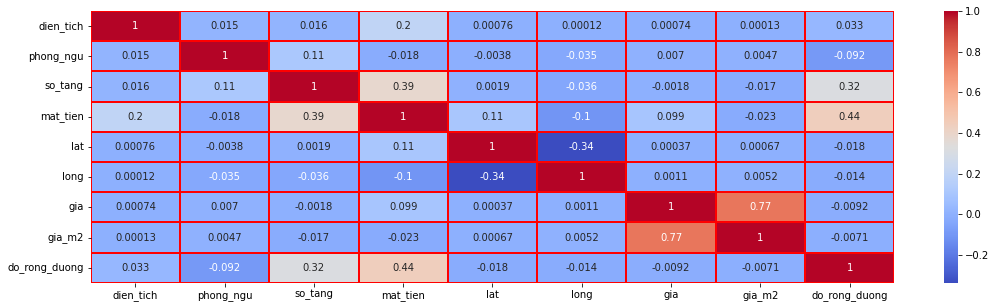

In [6]:
plt.figure(figsize=(18,5))
sns.heatmap(at_data.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")

In [7]:
print("Tr∆∞·ªõc: ",at_data.ten_quan.unique())
at_data["ten_quan"].replace({"Ba ƒê√¨nh": "Qu·∫≠n Ba ƒê√¨nh", 
                       "H√† ƒê√¥ng": "Qu·∫≠n H√† ƒê√¥ng", 
                       "ƒêan Ph∆∞·ª£ng": "Huy·ªán ƒêan Ph∆∞·ª£ng", 
                       "Ho√†i ƒê·ª©c": "Qu·∫≠n Ho√†i ƒê·ª©c", 
                       "Ba V√¨": "Huy·ªán Ba V√¨", 
                       'T√¢y H·ªì': 'Qu·∫≠n T√¢y H·ªì', 
                       "Long Bi√™n": "Qu·∫≠n Long Bi√™n", 
                       "C·∫ßu Gi·∫•y": "Qu·∫≠n C·∫ßu Gi·∫•y", 
                       "ƒê·ªëng ƒêa": "Qu·∫≠n ƒê·ªëng ƒêa", 
                       "Hai B√† Tr∆∞ng": "Qu·∫≠n Hai B√† Tr∆∞ng", 
                       "Ho√†ng Mai": "Qu·∫≠n Ho√†ng Mai", 
                       "Thanh Xu√¢n": "Qu·∫≠n Thanh Xu√¢n", 
                       'ƒê√¥ng Anh' : 'Huy·ªán ƒê√¥ng Anh', 
                       'Gia L√¢m' : 'Huy·ªán Gia L√¢m', 
                       'Thanh Tr√¨' : 'Huy·ªán Thanh Tr√¨',
                       "Nam T·ª´ Li√™m": "Qu·∫≠n Nam T·ª´ Li√™m",
                       "B·∫Øc T·ª´ Li√™m": "Qu·∫≠n B·∫Øc T·ª´ Li√™m",}
                      , inplace=True)
print("Sau: ",at_data.ten_quan.unique())

Tr∆∞·ªõc:  ['Qu·∫≠n Ba ƒê√¨nh' 'Ba ƒê√¨nh' 'Qu·∫≠n H√† ƒê√¥ng' 'H√† ƒê√¥ng' 'Ba V√¨'
 'Huy·ªán ƒêan Ph∆∞·ª£ng' 'ƒêan Ph∆∞·ª£ng' 'Huy·ªán Ho√†i ƒê·ª©c' 'Ho√†i ƒê·ª©c'
 'Huy·ªán Qu·ªëc Oai' 'Huy·ªán Th·∫°ch Th·∫•t' 'Huy·ªán Ch∆∞∆°ng M·ªπ' 'Huy·ªán Thanh Oai'
 'Huy·ªán Th∆∞·ªùng T√≠n' 'Qu·∫≠n Ho√†n Ki·∫øm' 'Qu·∫≠n T√¢y H·ªì' 'T√¢y H·ªì'
 'Qu·∫≠n Long Bi√™n' 'Long Bi√™n' 'Qu·∫≠n C·∫ßu Gi·∫•y' 'C·∫ßu Gi·∫•y' 'Qu·∫≠n ƒê·ªëng ƒêa'
 'ƒê·ªëng ƒêa' 'Qu·∫≠n Hai B√† Tr∆∞ng' 'Hai B√† Tr∆∞ng' 'Qu·∫≠n Ho√†ng Mai' 'Ho√†ng Mai'
 'Qu·∫≠n Thanh Xu√¢n' 'Thanh Xu√¢n' 'Huy·ªán S√≥c S∆°n' 'Huy·ªán ƒê√¥ng Anh'
 'ƒê√¥ng Anh' 'Huy·ªán Gia L√¢m' 'Gia L√¢m' 'Qu·∫≠n Nam T·ª´ Li√™m' 'Nam T·ª´ Li√™m'
 'Huy·ªán Thanh Tr√¨' 'Thanh Tr√¨' 'Qu·∫≠n B·∫Øc T·ª´ Li√™m' 'B·∫Øc T·ª´ Li√™m'
 'Huy·ªán M√™ Linh' 'Huy·ªán Ph√∫ Xuy√™n']
Sau:  ['Qu·∫≠n Ba ƒê√¨nh' 'Qu·∫≠n H√† ƒê√¥ng' 'Huy·ªán Ba V√¨' 'Huy·ªán ƒêan Ph∆∞·ª£ng'
 'Huy·ªán Ho√†i ƒê·ª©c' 'Qu·∫≠n Ho√†i ƒê·ª©c' 'Huy·ªán Qu·ªëc Oai' 'Huy·ªán Th·∫°ch Th·∫•t'
 'Huy·ªán Ch∆∞∆°ng

In [8]:
print("Tr∆∞·ªõc: ",at_data.huong_nha.unique())
at_data["huong_nha"].replace({"T√¢y-B·∫Øc": "T√¢y B·∫Øc", 
                       "ƒê√¥ng-Nam": "ƒê√¥ng nam", 
                       "ƒê√¥ng-B·∫Øc": "ƒê√¥ng B·∫Øc", 
                       "T√¢y-Nam": "T√¢y Nam",}
                      , inplace=True)
print("Sau: ",at_data.huong_nha.unique())

Tr∆∞·ªõc:  [nan 'T√¢y B·∫Øc' 'Nam' 'ƒê√¥ng' 'ƒê√¥ng Nam' 'T√¢y' 'B·∫Øc' 'T√¢y-B·∫Øc' 'KXƒê'
 'ƒê√¥ng-Nam' 'ƒê√¥ng-B·∫Øc' 'T√¢y-Nam' 'ƒê√¥ng B·∫Øc' 'T√¢y Nam' 'ƒê√¥ng nam']
Sau:  [nan 'T√¢y B·∫Øc' 'Nam' 'ƒê√¥ng' 'ƒê√¥ng Nam' 'T√¢y' 'B·∫Øc' 'KXƒê' 'ƒê√¥ng nam'
 'ƒê√¥ng B·∫Øc' 'T√¢y Nam']


In [9]:
#ƒê·ªïi c√°c gi√° tr·ªã nan th√†nh gi√° tr·ªã c√≥ th·ªÉ cho m√°y h·ªçc
def replaceNAN(df, ten_cot, gia_tri):
  if df[ten_cot].isna().sum() != 0:
    print("C·ªôt '",ten_cot,"' ƒë√£ chuy·ªÉn ƒë·ªïi",df[ten_cot].isna().sum(),"gi√° tr·ªã nan th√†nh:",gia_tri)
    df_doi = df.loc[:,(ten_cot)]
    df_doi = df_doi.fillna(gia_tri, inplace=True)
  else:
    print("C·ªôt '",ten_cot,"' kh√¥ng c√≥ gi√° tr·ªã nan")

def removeNAN(df, ten_cot):
  if df[ten_cot].isna().sum() != 0:
    print("C·ªôt '",ten_cot,"' ƒë√£ x√≥a gi√° tr·ªã nan")
    df.dropna(subset = [ten_cot],inplace = True)
  else:
    print("C·ªôt '",ten_cot,"' kh√¥ng c√≥ gi√° tr·ªã nan")

In [10]:
replaceNAN(at_data, 'so_do', 'kh√¥ng')

C·ªôt ' so_do ' ƒë√£ chuy·ªÉn ƒë·ªïi 21087 gi√° tr·ªã nan th√†nh: kh√¥ng


In [11]:
for i in at_data['so_do'].unique():
  if i != "kh√¥ng":
    at_data["so_do"].replace({i: "c√≥"}, inplace=True)
    print("Chuy·ªÉn ",i," Th√†nh c√¥ng")

Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng/ S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng  Th√†nh c√¥ng
Chuy·ªÉn  Ph√°p l√Ω r√µ r√†ng, s·ªü h·ªØu 50 nƒÉm r·ªìi CƒêT gia h·∫°n ti·∫øp cho kh√°ch h√†ng  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªü h·ªØu 50 nƒÉm, ph√°p l√Ω r√µ r√†ng.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  Gi·∫•y t·ªù h·ª£p l·ªá  Th√†nh c√¥ng
Chuy·ªÉn  CƒÉn h·ªô ƒë√£ c√≥ s·ªï dfor.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ƒë·∫πp nh∆∞ hoa h·∫≠u, ch·ªù giao d·ªãch.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè s·ªü h·ªØu l√¢u d√†i vƒ©nh vi·ªÖn.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè s·ªü h·ªØu 50 nƒÉm.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªü h·ªØu vƒ©nh vi·ªÖn, ph√°p l√Ω r√µ r√†ng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªü h·ªØu 50 nƒÉm

In [12]:
at_data['noi_that'] = at_data['noi_that'].fillna('tr·ªëng')

In [13]:
for i in at_data['noi_that']:
  if i != "tr·ªëng":
    if "t·∫∑ng" in i:
      at_data["noi_that"].replace({i: "t·∫∑ng"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    elif "T·∫∑ng" in i:
      at_data["noi_that"].replace({i: "t·∫∑ng"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    elif "cao c·∫•p" in i:
      at_data["noi_that"].replace({i: "cao c·∫•p"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    elif "Cao c·∫•p" in i:
      at_data["noi_that"].replace({i: "cao c·∫•p"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    else:
      at_data["noi_that"].replace({i: "ƒë·∫ßy ƒë·ªß"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")

K·∫øt qu·∫£ truy·ªÅn tr·ª±c tuy·∫øn b·ªã c·∫Øt b·ªõt ƒë·∫øn 5000 d√≤ng cu·ªëi.
Chuy·ªÉn  n·ªôi th·∫•t: t·ªß l·∫°nh ƒëi·ªÅu h√≤a , ti vi , l√≤ vi s√≥ng, b√†n gh·∫ø gi∆∞·ªùng t·ªß, n√≥ng l·∫°nh, thi·∫øt b·ªã v·ªá sinh, √°nh s√°ng... ch·ªâ vi·ªác s√°ch valy v·ªÅ ·ªü  Th√†nh c√¥ng
Chuy·ªÉn  N·ªôi th·∫•t b√†n giao theo ti√™u chu·∫©n CƒêT Vinhomes: ƒêi·ªÅu h√≤a Multi 2 chi·ªÅu Ho√†n thi·ªán tr·∫ßn th·∫°ch cao, s√†n ·ªëp g·∫°ch, t∆∞·ªùng nh√† H·ªá th·ªëng chi·∫øu s√°ng Thi·∫øt b·ªã v·ªá sinh cao c·∫•p TOTO Chu√¥ng h√¨nh th√¥ng minh  Th√†nh c√¥ng
Chuy·ªÉn  ƒë·∫ßy ƒë·ªß  Th√†nh c√¥ng
Chuy·ªÉn  ƒë·∫ßy ƒë·ªß  Th√†nh c√¥ng
Chuy·ªÉn  Full n·ªôi th·∫•t ƒë·∫πp + ch·∫•t l∆∞·ª£ng.  Th√†nh c√¥ng
Chuy·ªÉn  ƒë·∫ßy ƒë·ªß  Th√†nh c√¥ng
Chuy·ªÉn  ƒë·∫ßy ƒë·ªß  Th√†nh c√¥ng
Chuy·ªÉn  ƒë·∫ßy ƒë·ªß  Th√†nh c√¥ng
Chuy·ªÉn  ƒë·∫ßy ƒë·ªß  Th√†nh c√¥ng
Chuy·ªÉn  - ƒêi·ªÅu h√≤a - N√≥ng l·∫°nh - Full thi·∫øt b·ªã v·ªá sinh - T∆∞·ªùng tr·∫ßn th·∫°ch cao.  Th√†nh c√¥ng
Chuy·ªÉn  b√†n giao th√¥ ho√†n thi·ªán m·∫∑t ngo√†

In [14]:
at_data["noi_that"].unique()

array(['tr·ªëng', 'cao c·∫•p', 'ƒë·∫ßy ƒë·ªß', 't·∫∑ng'], dtype=object)

In [15]:
#D·ªØ li·ªáu ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†
at_data_new = at_data[['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']]

In [16]:
#Lo·∫°i b·ªè gi√° tr·ªã nan c√≥ trong gi√° nh√† ƒë·ªÉ d·ª± ƒëo√°n ch√≠nh x√°c h∆°n
at_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [17]:
#Ki·ªÉm tra t·ªïng gi√° tr·ªã nan c√≥ trong d·ªØ li·ªáu
at_data_new.isna().sum()

dien_tich             476
phong_ngu            7901
so_tang             29787
so_do                   0
ten_quan                0
huong_nha           18498
do_rong_duong       31743
do_rong_duong_ml    31719
noi_that                0
gia                     0
dtype: int64

In [18]:
removeNAN(at_data_new, 'dien_tich')

replaceNAN(at_data_new, 'phong_ngu',1)
replaceNAN(at_data_new, 'so_tang',1)
replaceNAN(at_data_new, 'huong_nha','KXƒê')
replaceNAN(at_data_new, 'do_rong_duong',0)
replaceNAN(at_data_new, 'do_rong_duong_ml','kh√¥ng')

C·ªôt ' dien_tich ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 7686 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 29318 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' huong_nha ' ƒë√£ chuy·ªÉn ƒë·ªïi 18152 gi√° tr·ªã nan th√†nh: KXƒê
C·ªôt ' do_rong_duong ' ƒë√£ chuy·ªÉn ƒë·ªïi 31268 gi√° tr·ªã nan th√†nh: 0
C·ªôt ' do_rong_duong_ml ' ƒë√£ chuy·ªÉn ƒë·ªïi 31245 gi√° tr·ªã nan th√†nh: kh√¥ng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [19]:
print(at_data_new.isna().sum())
at_data_new.reset_index(drop=True, inplace=True)
print("Hi·ªán c√≥:",at_data_new.shape[0],"d√≤ng")

dien_tich           0
phong_ngu           0
so_tang             0
so_do               0
ten_quan            0
huong_nha           0
do_rong_duong       0
do_rong_duong_ml    0
noi_that            0
gia                 0
dtype: int64
Hi·ªán c√≥: 31660 d√≤ng


In [20]:
#D√πng IQR ƒë·ªÉ x·ª≠ l√Ω ngo·∫°i lai
def outliner_remove(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df_new = df
  df_new['outlier'] = ~((df_new[col] < (Q1 - 1.5*IQR)) | (df_new[col] > (Q3 + 1.5*IQR)))
  df_new = df_new[df_new['outlier'] == True]
  df_new = df_new.drop(columns=['outlier'])
  return df_new

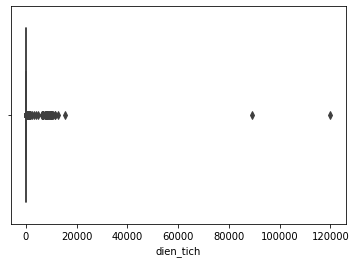

In [21]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
plt.rcParams["figure.figsize"] = (6,4)
sns.boxplot(x=at_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


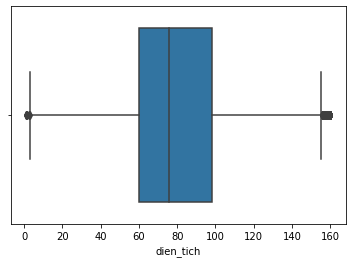

In [22]:
at_data_new = outliner_remove(at_data_new, 'dien_tich')
at_data_new = at_data_new[at_data_new.dien_tich >0]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['dien_tich'])

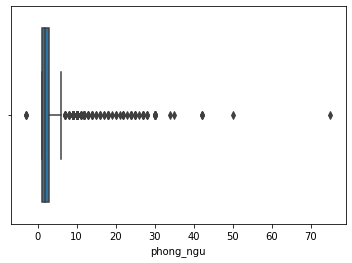

In [23]:
sns.boxplot(x=at_data_new['phong_ngu'])

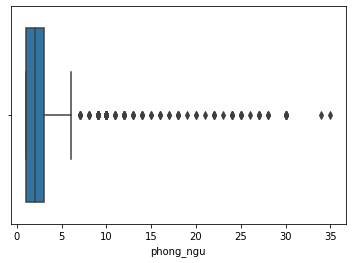

In [24]:
at_data_new = at_data_new[at_data_new['phong_ngu'] <40]
at_data_new = at_data_new[at_data_new['phong_ngu'] >0]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['phong_ngu'])

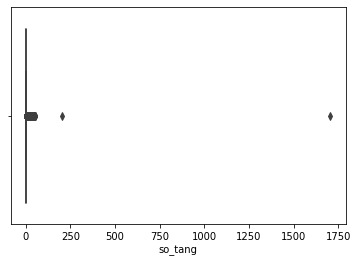

In [25]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=at_data_new['so_tang'])

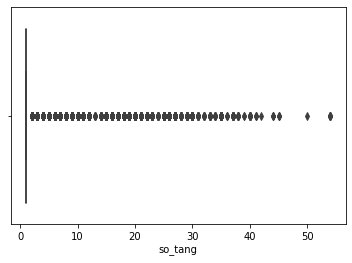

In [26]:
at_data_new = at_data_new[at_data_new['so_tang'] <100]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['so_tang'])

In [27]:
at_data_new['the_loai'] = 'Apartment'

In [28]:
at_data_new

dien_tich  phong_ngu  so_tang  so_do          ten_quan huong_nha  \
0           75.0        2.0      1.0     c√≥      Qu·∫≠n Ba ƒê√¨nh       KXƒê   
1          115.0        3.0      1.0     c√≥      Qu·∫≠n Ba ƒê√¨nh   T√¢y B·∫Øc   
2          100.0        2.0      1.0     c√≥      Qu·∫≠n Ba ƒê√¨nh       Nam   
3           30.0        2.0      2.0     c√≥      Qu·∫≠n Ba ƒê√¨nh       KXƒê   
4           72.0        2.0      3.0     c√≥      Qu·∫≠n Ba ƒê√¨nh      ƒê√¥ng   
...          ...        ...      ...    ...               ...       ...   
30564       35.0        1.0      1.0  kh√¥ng  Qu·∫≠n B·∫Øc T·ª´ Li√™m       KXƒê   
30565      122.0        4.0      1.0  kh√¥ng  Qu·∫≠n B·∫Øc T·ª´ Li√™m       KXƒê   
30566       72.0        2.0      1.0  kh√¥ng  Qu·∫≠n B·∫Øc T·ª´ Li√™m       KXƒê   
30567       54.0        2.0      1.0  kh√¥ng     Huy·ªán M√™ Linh       KXƒê   
30568       48.0        4.0      5.0  kh√¥ng     Huy·ªán M√™ Linh       KXƒê   

       do_rong_duong do_rong_duong_ml noi_that        gia   the_loai  
0                0.0            kh√¥ng    tr·ªëng   6300.000  Apartment  
1                0.0            kh√¥ng    tr·ªëng  10250.000  Apartment  
2                0.0            kh√¥ng    tr·ªëng   2600.000  Apartment  
3                0.0            kh√¥ng    tr·ªëng   3500.000  Apartment  
4                0.0            kh√¥ng    tr·ªëng   1750.000  Apartment  
...              ...              ...      ...        ...        ...  
30564            0.0            kh√¥ng    tr·ªëng    550.000  Apartment  
30565            0.0            kh√¥ng    tr·ªëng     11.000  Apartment  
30566            0.0            kh√¥ng    tr·ªëng      9.000  Apartment  
30567            0.0            kh√¥ng    tr·ªëng    432.000  Apartment  
30568            4.0       Ng√µ 1 √¥ t√¥    tr·ªëng      2.304  Apartment  

[30569 rows x 11 columns]

In [29]:
# cols = ['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']
# for i in cols:
#   sns.displot(data=at_data_new, x=i, kde=True)

#LandTrading data

In [30]:
lt_data = pd.read_csv("/content/drive/MyDrive/Data DA/LandTrading.csv", encoding='utf8').iloc[:, 1:]
lt_data

dien_tich huong_ban_cong  phong_ngu              id_thanh_pho  \
0          220.0            NaN        1.0  5e5501caeb80a7245175dddb   
1          500.0            NaN        NaN  5e5501caeb80a7245175dddb   
2          154.0            NaN        1.0  5e5501caeb80a7245175dddb   
3          116.0            NaN        NaN  5e5501caeb80a7245175dddb   
4          195.0            NaN        1.0  5e5501caeb80a7245175dddb   
...          ...            ...        ...                       ...   
27249       72.0            NaN        NaN  5e5501caeb80a7245175dddb   
27250       90.0            NaN        NaN  5e5501caeb80a7245175dddb   
27251      100.0            NaN        NaN  5e5501caeb80a7245175dddb   
27252      100.0            NaN        NaN  5e5501caeb80a7245175dddb   
27253       90.0            NaN        NaN  5e5501caeb80a7245175dddb   

          ten_thanh_pho                   id_quan         ten_quan  so_tang  \
0      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      1.0   
1      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      NaN   
2      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      1.0   
3      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      NaN   
4      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      1.0   
...                 ...                       ...              ...      ...   
27249  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27250  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27251  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27252  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27253  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   

       mat_tien noi_that  ...       gia      gia_m2  du_an  project_name  \
0           NaN      NaN  ...   30000.0  136.363636    NaN           NaN   
1           NaN      NaN  ...  195000.0  390.000000    NaN           NaN   
2           NaN      NaN  ...   40000.0  259.740260    NaN           NaN   
3           NaN      NaN  ...   14300.0  123.275862    NaN           NaN   
4           NaN      NaN  ...   26500.0  135.897436    NaN           NaN   
...         ...      ...  ...       ...         ...    ...           ...   
27249       NaN      NaN  ...     670.0    9.305556    NaN           NaN   
27250       NaN      NaN  ...     800.0    8.888889    NaN           NaN   
27251       8.0      NaN  ...       NaN         NaN    NaN           NaN   
27252       NaN      NaN  ...       NaN         NaN    NaN           NaN   
27253       NaN      NaN  ...    2150.0   23.888889    NaN           NaN   

                       id_duong             ten_duong do_rong_duong  \
0      5e958ee8208d0d6d7648f9cc         Ph·ªë Linh Lang          10.0   
1      5e958ee8208d0d6d7648f96d     ƒê∆∞·ªùng Cao B√° Qu√°t          40.0   
2      5e958ee8208d0d6d7648f978         ƒê∆∞·ªùng ƒê·ªôi C·∫•n          20.0   
3      5e958ee8208d0d6d7648f974         ƒê∆∞·ªùng ƒê√†o T·∫•n           8.0   
4      5e958ee8208d0d6d7648f97a  ƒê∆∞·ªùng Giang VƒÉn Minh         100.0   
...                         ...                   ...           ...   
27249                       NaN                   NaN           NaN   
27250  5e958eef208d0d6d76490f18      ƒê∆∞·ªùng Qu·ªëc l·ªô 1A           NaN   
27251  5e958eef208d0d6d76490f1c     ƒê∆∞·ªùng T·ªânh l·ªô 428           NaN   
27252                       NaN                   NaN           NaN   
27253  5e958eef208d0d6d76490f18      ƒê∆∞·ªùng Qu·ªëc l·ªô 1A           NaN   

         do_rong_duong_ml                 id_phuong          ten_phuong  
0        Ng√µ 4 √¥ t√¥ tr√°nh  5e5501cbeb80a7245175e0e4      Ph∆∞·ªùng C·ªëng V·ªã  
1      Ng√µ 4 √¥ t√¥ tr·ªü l√™n  5e5501cbeb80a7245175e0e9    Ph∆∞·ªùng ƒêi·ªán Bi√™n  
2      Ng√µ 4 √¥ t√¥ tr·ªü 

In [31]:
print("Tr∆∞·ªõc: ",lt_data.ten_quan.unique())
at_data["ten_quan"].replace({"H√† ƒê√¥ng": "Qu·∫≠n H√† ƒê√¥ng",
                             'S∆°n T√¢y':'Th·ªã x√£ S∆°n T√¢y',
                             'ƒêan Ph∆∞·ª£ng':'Huy·ªán ƒêan Ph∆∞·ª£ng',
                             'Qu·ªëc Oai':'Huy·ªán Qu·ªëc Oai',
                             'Th·∫°ch Th·∫•t':'Huy·ªán Th·∫°ch Th·∫•t',
                             'Th∆∞·ªùng T√≠n':'Huy·ªán Th∆∞·ªùng T√≠n',
                             'T√¢y H·ªì':'Qu·∫≠n T√¢y H·ªì',
                             'Long Bi√™n':'Qu·∫≠n Long Bi√™n',
                             'ƒê·ªëng ƒêa':'Qu·∫≠n ƒê·ªëng ƒêa',
                             'Hai B√† Tr∆∞ng':'Qu·∫≠n Hai B√† Tr∆∞ng',
                             'Ho√†ng Mai':'Qu·∫≠n Ho√†ng Mai',
                             'Thanh Xu√¢n':'Qu·∫≠n Thanh Xu√¢n',
                             'S√≥c S∆°n':'Huy·ªán S√≥c S∆°n',
                             'Nam T·ª´ Li√™m':'Qu·∫≠n Nam T·ª´ Li√™m',
                             'Thanh Tr√¨':'Huy·ªán Thanh Tr√¨',
                             'B·∫Øc T·ª´ Li√™m':'Qu·∫≠n B·∫Øc T·ª´ Li√™m',
                             'Ph√∫ Xuy√™n':'Huy·ªán Ph√∫ Xuy√™n'}
                      , inplace=True)
print("Sau: ",at_data.ten_quan.unique())

Tr∆∞·ªõc:  ['Qu·∫≠n Ba ƒê√¨nh' 'Qu·∫≠n H√† ƒê√¥ng' 'H√† ƒê√¥ng' 'Th·ªã x√£ S∆°n T√¢y' 'S∆°n T√¢y'
 'Huy·ªán Ba V√¨' 'Huy·ªán Ph√∫c Th·ªç' 'Huy·ªán ƒêan Ph∆∞·ª£ng' 'ƒêan Ph∆∞·ª£ng'
 'Huy·ªán Ho√†i ƒê·ª©c' 'Huy·ªán Qu·ªëc Oai' 'Qu·ªëc Oai' 'Huy·ªán Th·∫°ch Th·∫•t'
 'Th·∫°ch Th·∫•t' 'Huy·ªán Ch∆∞∆°ng M·ªπ' 'Huy·ªán Thanh Oai' 'Huy·ªán Th∆∞·ªùng T√≠n'
 'Th∆∞·ªùng T√≠n' 'Qu·∫≠n Ho√†n Ki·∫øm' 'Huy·ªán ·ª®ng H√≤a' 'Huy·ªán M·ªπ ƒê·ª©c'
 'Qu·∫≠n T√¢y H·ªì' 'T√¢y H·ªì' 'Qu·∫≠n Long Bi√™n' 'Long Bi√™n' 'Qu·∫≠n C·∫ßu Gi·∫•y'
 'Qu·∫≠n ƒê·ªëng ƒêa' 'ƒê·ªëng ƒêa' 'Qu·∫≠n Hai B√† Tr∆∞ng' 'Hai B√† Tr∆∞ng' 'Ho√†ng Mai'
 'Qu·∫≠n Ho√†ng Mai' 'Qu·∫≠n Thanh Xu√¢n' 'Thanh Xu√¢n' 'Huy·ªán S√≥c S∆°n' 'S√≥c S∆°n'
 'Huy·ªán ƒê√¥ng Anh' 'Huy·ªán Gia L√¢m' 'Nam T·ª´ Li√™m' 'Qu·∫≠n Nam T·ª´ Li√™m'
 'Thanh Tr√¨' 'Huy·ªán Thanh Tr√¨' 'Qu·∫≠n B·∫Øc T·ª´ Li√™m' 'B·∫Øc T·ª´ Li√™m'
 'Huy·ªán M√™ Linh' 'Huy·ªán Ph√∫ Xuy√™n' 'Ph√∫ Xuy√™n']
Sau:  ['Qu·∫≠n Ba ƒê√¨nh' 'Qu·∫≠n H√† ƒê√¥ng' 'Huy·ªán Ba V√¨' 'Huy·ªán ƒêan Ph∆∞·ª

In [32]:
print("Tr∆∞·ªõc: ",lt_data.huong_nha.unique())
lt_data["huong_nha"].replace({"T√¢y-B·∫Øc": "T√¢y B·∫Øc", 
                       "ƒê√¥ng-Nam": "ƒê√¥ng nam", 
                       "ƒê√¥ng-B·∫Øc": "ƒê√¥ng B·∫Øc", 
                       "T√¢y-Nam": "T√¢y Nam",}
                      , inplace=True)
print("Sau: ",lt_data.huong_nha.unique())

Tr∆∞·ªõc:  [nan 'ƒê√¥ng' 'ƒê√¥ng Nam' 'KXƒê' 'T√¢y' 'ƒê√¥ng B·∫Øc' 'T√¢y Nam' 'B·∫Øc' 'Nam'
 'T√¢y-B·∫Øc' 'ƒê√¥ng-B·∫Øc' 'T√¢y-Nam' 'ƒê√¥ng-Nam' 'T√¢y B·∫Øc' 'ƒê√¥ng nam']
Sau:  [nan 'ƒê√¥ng' 'ƒê√¥ng Nam' 'KXƒê' 'T√¢y' 'ƒê√¥ng B·∫Øc' 'T√¢y Nam' 'B·∫Øc' 'Nam'
 'T√¢y B·∫Øc' 'ƒê√¥ng nam']


In [33]:
replaceNAN(lt_data, 'so_do', 'kh√¥ng')

C·ªôt ' so_do ' ƒë√£ chuy·ªÉn ƒë·ªïi 12566 gi√° tr·ªã nan th√†nh: kh√¥ng


In [34]:
for i in lt_data['so_do'].unique():
  if i != "kh√¥ng":
    lt_data["so_do"].replace({i: "c√≥"}, inplace=True)
    print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
lt_data["so_do"].unique()

Chuy·ªÉn  S·ªï h·ªìng/ S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  Gi·∫•y t·ªù h·ª£p l·ªá  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, n·ªü h·∫≠u, s·∫µn s√†ng giao d·ªãch.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè vu√¥ng ƒë·∫πp s·∫µn s√†ng giao d·ªãch  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ch√≠nh ch·ªß vu√¥ng ƒë·∫πp  Th√†nh c√¥ng
Chuy·ªÉn  H·ªì s∆° ph√°p l√Ω ƒë·∫ßy ƒë·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, ph√°p l√Ω s·∫°ch ƒë·∫πp.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, ph√°p l√Ω chu·∫©n.  Th√†nh c√¥ng
Chuy·ªÉn  H·ªì s∆° vƒÉn t·ª±  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè s·∫µn s√†ng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè, ph√°p l√Ω ƒë·∫ßy ƒë·ª

array(['c√≥', 'kh√¥ng'], dtype=object)

In [35]:
lt_data['noi_that'] = lt_data['noi_that'].fillna('tr·ªëng')
for i in lt_data['noi_that']:
  if i != "tr·ªëng":
    if "t·∫∑ng" in i:
      lt_data["noi_that"].replace({i: "t·∫∑ng"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    elif "T·∫∑ng" in i:
      lt_data["noi_that"].replace({i: "t·∫∑ng"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    elif "cao c·∫•p" in i:
      lt_data["noi_that"].replace({i: "cao c·∫•p"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    elif "Cao c·∫•p" in i:
      lt_data["noi_that"].replace({i: "cao c·∫•p"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    else:
      lt_data["noi_that"].replace({i: "ƒë·∫ßy ƒë·ªß"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")

Chuy·ªÉn  N·ªôi th·∫•t x·ªãn, s√†n g·ªó, thi·∫øt b·ªã ngo·∫°i nh·∫≠p ƒë·∫ßy ƒë·ªß. B·∫£o h√†nh tr·ªçn ƒë·ªùi.  Th√†nh c√¥ng
Chuy·ªÉn  ƒê·∫ßy ƒë·ªß n·ªôi th·∫•t  Th√†nh c√¥ng
Chuy·ªÉn  B√°n ƒê·∫•t T·∫∑ng nh√†.  Th√†nh c√¥ng
Chuy·ªÉn  C√°ch ch·ª£ Y√™n Nghƒ©a 100m v√† r·∫•t g·∫ßn ch·ª£ H√† ƒê√¥ng, c√°ch b·ªánh vi·ªán Qu√¢n Y 103 v√† BVƒêK 16, Thi√™n ƒê·ª©c ch·ªâ 3km. G·∫ßn r·∫•t nhi·ªÅu tr∆∞·ªùng ƒêH Top 1 nh∆∞: HVCN B∆∞u Ch√≠nh Vi·ªÖn Th√¥ng, ƒêH Ki·∫øn Tr√∫c, HVAN, HV Y D∆∞·ª£c h·ªçc  Th√†nh c√¥ng
Chuy·ªÉn  ƒê·∫ßy ƒë·ªß ti·ªán √≠ch Kinh Doanh.  Th√†nh c√¥ng
Chuy·ªÉn  ƒê·∫πp m·ªõi  Th√†nh c√¥ng
Chuy·ªÉn  B√°n ƒê·∫•t t·∫∑ng Nh√† c·∫•p 4, Kinh Doanh.  Th√†nh c√¥ng
Chuy·ªÉn  N·ªôi th·∫•t ƒë·∫πp, sang tr·ªçng  Th√†nh c√¥ng
Chuy·ªÉn  ƒê·∫•t kh√¥ng  Th√†nh c√¥ng
Chuy·ªÉn  ƒê·∫•t  Th√†nh c√¥ng
Chuy·ªÉn  ƒê·∫πp  Th√†nh c√¥ng
Chuy·ªÉn  Cao C·∫•p, Hi·ªán ƒë·∫°i.  Th√†nh c√¥ng
Chuy·ªÉn  Kh√°ch x√°c ƒë·ªãnh mua ƒë·∫•t  Th√†nh c√¥ng
Chuy·ªÉn  ƒê·∫ßy ƒë·ªß  Th√†nh c√¥ng
Chuy·ªÉn  B√°n ƒê·∫•t t·∫∑ng Nh

In [36]:
#D·ªØ li·ªáu ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†
lt_data_new = lt_data[['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']]

In [37]:
#Lo·∫°i b·ªè gi√° tr·ªã nan c√≥ trong gi√° nh√† ƒë·ªÉ d·ª± ƒëo√°n ch√≠nh x√°c h∆°n
lt_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [38]:
lt_data_new.isna().sum()

dien_tich             103
phong_ngu           21920
so_tang             21715
so_do                   0
ten_quan                0
huong_nha           15821
do_rong_duong       19987
do_rong_duong_ml    19494
noi_that                0
gia                     0
dtype: int64

In [39]:
removeNAN(lt_data_new, 'dien_tich')

replaceNAN(lt_data_new, 'phong_ngu',1)
replaceNAN(lt_data_new, 'so_tang',1)
replaceNAN(lt_data_new, 'huong_nha','KXƒê')
replaceNAN(lt_data_new, 'do_rong_duong',0)
replaceNAN(lt_data_new, 'do_rong_duong_ml','kh√¥ng')
print(lt_data_new.isna().sum())
lt_data_new.reset_index(drop=True, inplace=True)
print("Hi·ªán c√≥:",lt_data_new.shape[0],"d√≤ng")

C·ªôt ' dien_tich ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 21818 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 21613 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' huong_nha ' ƒë√£ chuy·ªÉn ƒë·ªïi 15731 gi√° tr·ªã nan th√†nh: KXƒê
C·ªôt ' do_rong_duong ' ƒë√£ chuy·ªÉn ƒë·ªïi 19888 gi√° tr·ªã nan th√†nh: 0
C·ªôt ' do_rong_duong_ml ' ƒë√£ chuy·ªÉn ƒë·ªïi 19399 gi√° tr·ªã nan th√†nh: kh√¥ng
dien_tich           0
phong_ngu           0
so_tang             0
so_do               0
ten_quan            0
huong_nha           0
do_rong_duong       0
do_rong_duong_ml    0
noi_that            0
gia                 0
dtype: int64
Hi·ªán c√≥: 22864 d√≤ng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


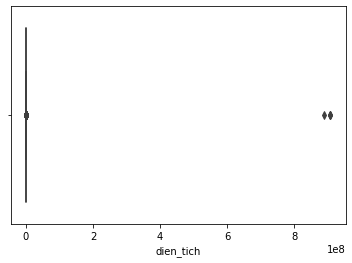

In [40]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=lt_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


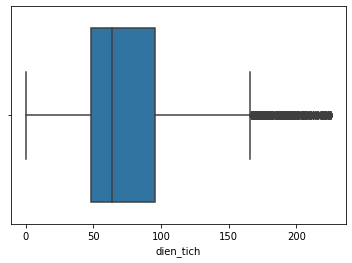

In [41]:
lt_data_new = outliner_remove(lt_data_new, 'dien_tich')
lt_data_new = lt_data_new[lt_data_new.dien_tich >0]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['dien_tich'])

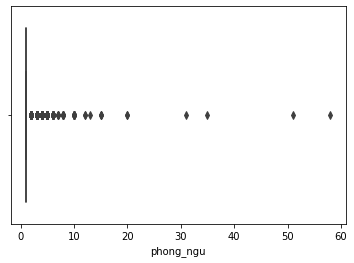

In [42]:
sns.boxplot(x=lt_data_new['phong_ngu'])

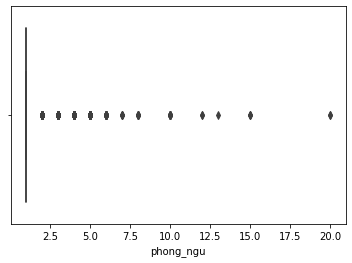

In [43]:
lt_data_new = lt_data_new[lt_data_new.phong_ngu <30]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['phong_ngu'])

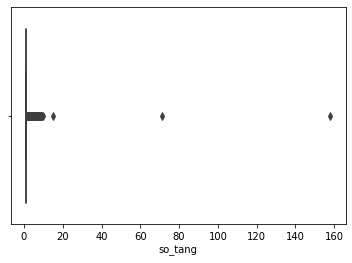

In [44]:
sns.boxplot(x=lt_data_new['so_tang'])

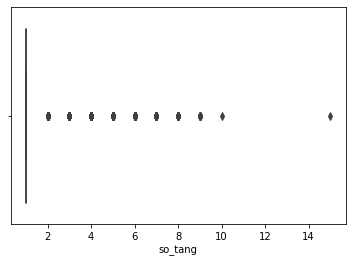

In [45]:
lt_data_new = lt_data_new[lt_data_new.so_tang <60]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['so_tang'])

In [46]:
lt_data_new['the_loai'] = 'Land'

In [47]:
lt_data_new

dien_tich  phong_ngu  so_tang so_do         ten_quan huong_nha  \
0          220.0        1.0      1.0    c√≥     Qu·∫≠n Ba ƒê√¨nh       KXƒê   
1          154.0        1.0      1.0    c√≥     Qu·∫≠n Ba ƒê√¨nh       KXƒê   
2          116.0        1.0      1.0    c√≥     Qu·∫≠n Ba ƒê√¨nh       KXƒê   
3          195.0        1.0      1.0    c√≥     Qu·∫≠n Ba ƒê√¨nh       KXƒê   
4          100.0        5.0      1.0    c√≥     Qu·∫≠n Ba ƒê√¨nh       KXƒê   
...          ...        ...      ...   ...              ...       ...   
19822       72.0        1.0      1.0    c√≥  Huy·ªán Ph√∫ Xuy√™n       KXƒê   
19823      120.0        1.0      1.0    c√≥  Huy·ªán Ph√∫ Xuy√™n       KXƒê   
19824       72.0        1.0      1.0    c√≥  Huy·ªán Ph√∫ Xuy√™n       KXƒê   
19825       90.0        1.0      1.0    c√≥  Huy·ªán Ph√∫ Xuy√™n       Nam   
19826       90.0        1.0      1.0    c√≥  Huy·ªán Ph√∫ Xuy√™n  ƒê√¥ng Nam   

       do_rong_duong    do_rong_duong_ml noi_that       gia the_loai  
0               10.0    Ng√µ 4 √¥ t√¥ tr√°nh    tr·ªëng  30000.00     Land  
1               20.0  Ng√µ 4 √¥ t√¥ tr·ªü l√™n    tr·ªëng  40000.00     Land  
2                8.0    Ng√µ 3 √¥ t√¥ tr√°nh    tr·ªëng  14300.00     Land  
3              100.0  Ng√µ 4 √¥ t√¥ tr·ªü l√™n    tr·ªëng  26500.00     Land  
4                0.0               kh√¥ng    tr·ªëng   5400.00     Land  
...              ...                 ...      ...       ...      ...  
19822            0.0               kh√¥ng    tr·ªëng    600.00     Land  
19823            0.0               kh√¥ng    tr·ªëng    554.48     Land  
19824            0.0               kh√¥ng    tr·ªëng    670.00     Land  
19825            0.0               kh√¥ng    tr·ªëng    800.00     Land  
19826            0.0               kh√¥ng    tr·ªëng   2150.00     Land  

[19827 rows x 11 columns]

In [48]:
# cols = ['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']
# for i in cols:
#   sns.displot(data=lt_data_new, x=i, kde=True)

#RoadSurfaceHouseTrading data

In [49]:
rsht_data = pd.read_csv("/content/drive/MyDrive/Data DA/RoadSurfaceHouseTrading.csv", encoding='utf8').iloc[:, 1:]
rsht_data

dien_tich huong_ban_cong  phong_ngu              id_thanh_pho  \
0           42.0            NaN        2.0  5e5501caeb80a7245175dddb   
1          220.0            NaN        NaN  5e5501caeb80a7245175dddb   
2           69.0       ƒê√¥ng-Nam        9.0  5e5501caeb80a7245175dddb   
3           50.0            NaN        NaN  5e5501caeb80a7245175dddb   
4           72.0            NaN        5.0  5e5501caeb80a7245175dddb   
...          ...            ...        ...                       ...   
62842       80.0            NaN        3.0  5e5501caeb80a7245175dddb   
62843       80.0            NaN        3.0  5e5501caeb80a7245175dddb   
62844      105.0            NaN        6.0  5e5501caeb80a7245175dddb   
62845       70.0            NaN        1.0  5e5501caeb80a7245175dddb   
62846       70.0            NaN        2.0  5e5501caeb80a7245175dddb   

          ten_thanh_pho                   id_quan       ten_quan  so_tang  \
0      Th√†nh ph·ªë H√† N·ªôi                       NaN            NaN      3.0   
1      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      NaN   
2      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      7.0   
3      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      5.0   
4      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      5.0   
...                 ...                       ...            ...      ...   
62842  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      3.0   
62843  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      3.0   
62844  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      NaN   
62845  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      1.0   
62846  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      1.0   

       mat_tien                                           noi_that  ...  \
0           NaN                                                NaN  ...   
1           NaN                                                NaN  ...   
2           8.3  Nh√† x√¢y ki√™n c·ªë, s∆°n nh√† tr·∫Øng Kova m·ªõi s∆°n l·∫°...  ...   
3           NaN                                                NaN  ...   
4           6.0                                                NaN  ...   
...         ...                                                ...  ...   
62842       NaN                                                NaN  ...   
62843       NaN                                                NaN  ...   
62844       5.0                                           Kh√¥ng NT  ...   
62845       NaN                                                NaN  ...   
62846       NaN                                                NaN  ...   

           gia      gia_m2  du_an  project_name                  id_duong  \
0       2250.0   53.571429    NaN           NaN                       NaN   
1      61000.0  277.272727    NaN           NaN                       NaN   
2      21000.0  304.347826    NaN           NaN  5e958ee8208d0d6d7648f98f   
3      25000.0  500.000000    NaN           NaN  5e958ee8208d0d6d7648f9ac   
4      12000.0  166.666667    NaN           NaN  5e958ee8208d0d6d7648f974   
...        ...         ...    ...           ...                       ...   
62842   4500.0   56.250000    NaN           NaN                       NaN   
62843   4950.0   61.875000    NaN           NaN  5e958eee208d0d6d76490ae8   
62844      NaN         NaN    NaN           NaN  5e958eee208d0d6d76490ae7   
62845   2400.0   34.285714    NaN           NaN  5e958eee208d0d6d76490aeb   
62846   4000.0   34.285714    NaN           NaN  5e958eee208d0d6d76490aeb   

                    ten_duong do_rong_duong     do_rong_duong_ml  \
0                         NaN           3.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng   
1                         NaN           NaN  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng   
2      ƒê∆∞·ªùng Nguy·ªÖn C√¥ng Hoan           NaN  M·∫∑t p

In [50]:
print("Tr∆∞·ªõc: ",rsht_data.ten_quan.unique())
rsht_data["ten_quan"].replace({'Ba ƒê√¨nh': 'Qu·∫≠n Ba ƒê√¨nh',
                               'H√† ƒê√¥ng':'Qu·∫≠n H√† ƒê√¥ng',
                               'Th∆∞·ªùng T√≠n':'Huy·ªán Th∆∞·ªùng T√≠n',
                               'Ho√†n Ki·∫øm':'Qu·∫≠n Ho√†n Ki·∫øm',
                               'T√¢y H·ªì' :'Qu·∫≠n T√¢y H·ªì',
                               'Long Bi√™n':'Qu·∫≠n Long Bi√™n',
                               'C·∫ßu Gi·∫•y':'Qu·∫≠n C·∫ßu Gi·∫•y',
                               'ƒê·ªëng ƒêa':'Qu·∫≠n ƒê·ªëng ƒêa',
                               'Hai B√† Tr∆∞ng':'Qu·∫≠n Hai B√† Tr∆∞ng',
                               'Ho√†ng Mai' :'Qu·∫≠n Ho√†ng Mai',
                               'Thanh Xu√¢n':'Qu·∫≠n Thanh Xu√¢n',
                               'Nam T·ª´ Li√™m':'Qu·∫≠n Nam T·ª´ Li√™m',
                               'B·∫Øc T·ª´ Li√™m':'Qu·∫≠n B·∫Øc T·ª´ Li√™m'}
                      , inplace=True)
print("Sau: ",rsht_data.ten_quan.unique())

Tr∆∞·ªõc:  [nan 'Qu·∫≠n Ba ƒê√¨nh' 'Ba ƒê√¨nh' 'H√† ƒê√¥ng' 'Qu·∫≠n H√† ƒê√¥ng' 'Th·ªã x√£ S∆°n T√¢y'
 'Huy·ªán Ba V√¨' 'Huy·ªán ƒêan Ph∆∞·ª£ng' 'Huy·ªán Ho√†i ƒê·ª©c' 'Huy·ªán Qu·ªëc Oai'
 'Huy·ªán Th·∫°ch Th·∫•t' 'Huy·ªán Ch∆∞∆°ng M·ªπ' 'Huy·ªán Thanh Oai' 'Huy·ªán Th∆∞·ªùng T√≠n'
 'Th∆∞·ªùng T√≠n' 'Qu·∫≠n Ho√†n Ki·∫øm' 'Ho√†n Ki·∫øm' 'T√¢y H·ªì' 'Qu·∫≠n T√¢y H·ªì'
 'Qu·∫≠n Long Bi√™n' 'Long Bi√™n' 'Qu·∫≠n C·∫ßu Gi·∫•y' 'C·∫ßu Gi·∫•y' 'Qu·∫≠n ƒê·ªëng ƒêa'
 'ƒê·ªëng ƒêa' 'Qu·∫≠n Hai B√† Tr∆∞ng' 'Hai B√† Tr∆∞ng' 'Ho√†ng Mai' 'Qu·∫≠n Ho√†ng Mai'
 'Qu·∫≠n Thanh Xu√¢n' 'Thanh Xu√¢n' 'Huy·ªán S√≥c S∆°n' 'Huy·ªán ƒê√¥ng Anh'
 'Huy·ªán Gia L√¢m' 'Qu·∫≠n Nam T·ª´ Li√™m' 'Nam T·ª´ Li√™m' 'Huy·ªán Thanh Tr√¨'
 'Qu·∫≠n B·∫Øc T·ª´ Li√™m' 'B·∫Øc T·ª´ Li√™m' 'Huy·ªán M√™ Linh']
Sau:  [nan 'Qu·∫≠n Ba ƒê√¨nh' 'Qu·∫≠n H√† ƒê√¥ng' 'Th·ªã x√£ S∆°n T√¢y' 'Huy·ªán Ba V√¨'
 'Huy·ªán ƒêan Ph∆∞·ª£ng' 'Huy·ªán Ho√†i ƒê·ª©c' 'Huy·ªán Qu·ªëc Oai' 'Huy·ªán Th·∫°ch Th·∫•t'
 'Huy·ªán Ch∆∞∆°ng M·ªπ' 'Huy·ªán Thanh 

In [51]:
print("Tr∆∞·ªõc: ",rsht_data.huong_nha.unique())
rsht_data["huong_nha"].replace({"T√¢y-B·∫Øc": "T√¢y B·∫Øc", 
                       "ƒê√¥ng-Nam": "ƒê√¥ng nam", 
                       "ƒê√¥ng-B·∫Øc": "ƒê√¥ng B·∫Øc", 
                       "T√¢y-Nam": "T√¢y Nam",}
                      , inplace=True)
print("Sau: ",rsht_data.huong_nha.unique())

Tr∆∞·ªõc:  [nan 'ƒê√¥ng-Nam' 'ƒê√¥ng' 'ƒê√¥ng B·∫Øc' 'T√¢y B·∫Øc' 'B·∫Øc' 'ƒê√¥ng Nam' 'Nam' 'T√¢y'
 'KXƒê' 'T√¢y Nam' 'T√¢y-Nam' 'ƒê√¥ng-B·∫Øc' 'T√¢y-B·∫Øc' 'ƒê√¥ng nam']
Sau:  [nan 'ƒê√¥ng nam' 'ƒê√¥ng' 'ƒê√¥ng B·∫Øc' 'T√¢y B·∫Øc' 'B·∫Øc' 'ƒê√¥ng Nam' 'Nam' 'T√¢y'
 'KXƒê' 'T√¢y Nam']


In [52]:
replaceNAN(rsht_data, 'so_do', 'kh√¥ng')

C·ªôt ' so_do ' ƒë√£ chuy·ªÉn ƒë·ªïi 23273 gi√° tr·ªã nan th√†nh: kh√¥ng


In [53]:
for i in rsht_data['so_do'].unique():
  if i != "kh√¥ng":
    rsht_data["so_do"].replace({i: "c√≥"}, inplace=True)
    print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
rsht_data["so_do"].unique()

Chuy·ªÉn  Gi·∫•y ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï h·ªìng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng/ S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  Gi·∫•y t·ªù h·ª£p l·ªá  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, ph√°p l√≠ r√µ r√†ng.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ƒë·∫πp n·ªü h·∫≠u s·∫µn s√†ng giao d·ªãch  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè vu√¥ng ƒë·∫πp s·∫µn s√†ng giao d·ªãch.  Th√†nh c√¥ng
Chuy·ªÉn  Ph√°p l√Ω c·ª±c chu·∫©n, s·ªï ƒë·ªè ch√≠nh ch·ªß, n·ªü h·∫≠u phong thu·ª∑ qu√° ƒë·∫πp, s·∫µn s√†ng giao d·ªãch  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß vu√¥ng v·∫Øn n·ªü h·∫≠u.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  Ph√°p l√Ω s·∫°ch, kh√¥ng quy ho·∫°ch  Th√†nh c√¥ng
Chuy·ªÉn  Nh√† c√≥ s·ªï ƒë·ªè ch√≠nh ch·ªß vu√¥ng v·∫Øn v√† ri√™ng bi·ªát.  Th√†nh c√¥ng
Chuy·

array(['c√≥', 'kh√¥ng'], dtype=object)

In [54]:
rsht_data['noi_that'] = rsht_data['noi_that'].fillna('tr·ªëng')
for i in rsht_data['noi_that']:
  if i != "tr·ªëng":
    if "t·∫∑ng" in i:
      rsht_data["noi_that"].replace({i: "t·∫∑ng"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    elif "T·∫∑ng" in i:
      rsht_data["noi_that"].replace({i: "t·∫∑ng"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    elif "cao c·∫•p" in i:
      rsht_data["noi_that"].replace({i: "cao c·∫•p"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    elif "Cao c·∫•p" in i:
      rsht_data["noi_that"].replace({i: "cao c·∫•p"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
    else:
      rsht_data["noi_that"].replace({i: "ƒë·∫ßy ƒë·ªß"}, inplace=True)
      print("Chuy·ªÉn ",i," Th√†nh c√¥ng")

K·∫øt qu·∫£ truy·ªÅn tr·ª±c tuy·∫øn b·ªã c·∫Øt b·ªõt ƒë·∫øn 5000 d√≤ng cu·ªëi.
Chuy·ªÉn  cao c·∫•p  Th√†nh c√¥ng
Chuy·ªÉn  cao c·∫•p  Th√†nh c√¥ng
Chuy·ªÉn  N·ªôi th·∫•t cao c·∫•p hi·ªán ƒë·∫°i  Th√†nh c√¥ng
Chuy·ªÉn  Full n·ªôi th·∫•t c∆° b·∫£n li·ªÅn t∆∞·ªùng  Th√†nh c√¥ng
Chuy·ªÉn  Fulll  Th√†nh c√¥ng
Chuy·ªÉn  cao c·∫•p  Th√†nh c√¥ng
Chuy·ªÉn  ƒêi·ªÅu h√≤a t·ªïng t·ª´ng t·∫ßng. T·∫ßng 1 ƒë·∫øn t·∫ßng 7 thi·∫øt k·∫ø th√¥ng s√†n.  Th√†nh c√¥ng
Chuy·ªÉn  Nh·∫≠p Kh·∫©u.  Th√†nh c√¥ng
Chuy·ªÉn  N·ªôi th·∫•t ƒë·∫ßy ƒë·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  ti·ªán nghi - sang tr·ªçng  Th√†nh c√¥ng
Chuy·ªÉn  cao c·∫•p  Th√†nh c√¥ng
Chuy·ªÉn  ƒë·∫ßy ƒë·ªß  Th√†nh c√¥ng
Chuy·ªÉn  Thang M√°y  Th√†nh c√¥ng
Chuy·ªÉn  Nh·∫≠p kh·∫©u.  Th√†nh c√¥ng
Chuy·ªÉn  Full n·ªôi th·∫•t.  Th√†nh c√¥ng
Chuy·ªÉn  ƒë·∫ßy ƒë·ªß  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ thang m√°y, ƒëi·ªÅu h√≤a, b·∫øp...  Th√†nh c√¥ng
Chuy·ªÉn  ƒë·∫ßy ƒë·ªß  Th√†nh c√¥ng
Chuy·ªÉn  ƒë·∫ßy ƒë·ªß  Th√†nh c√¥ng
Chuy·ªÉn  N·ªôi th·∫•t hi·ªán ƒë·∫°i, sang tr·ª

In [55]:
rsht_data['noi_that'].unique()

array(['tr·ªëng', 'ƒë·∫ßy ƒë·ªß', 'cao c·∫•p', 't·∫∑ng'], dtype=object)

In [56]:
#D·ªØ li·ªáu ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†
rsht_data_new = rsht_data[['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']]
rsht_data_new

dien_tich  phong_ngu  so_tang  so_do       ten_quan huong_nha  \
0           42.0        2.0      3.0     c√≥            NaN       NaN   
1          220.0        NaN      NaN     c√≥   Qu·∫≠n Ba ƒê√¨nh       NaN   
2           69.0        9.0      7.0     c√≥   Qu·∫≠n Ba ƒê√¨nh  ƒê√¥ng nam   
3           50.0        NaN      5.0  kh√¥ng   Qu·∫≠n Ba ƒê√¨nh       NaN   
4           72.0        5.0      5.0     c√≥   Qu·∫≠n Ba ƒê√¨nh       NaN   
...          ...        ...      ...    ...            ...       ...   
62842       80.0        3.0      3.0     c√≥  Huy·ªán M√™ Linh       NaN   
62843       80.0        3.0      3.0     c√≥  Huy·ªán M√™ Linh       NaN   
62844      105.0        6.0      NaN     c√≥  Huy·ªán M√™ Linh       NaN   
62845       70.0        1.0      1.0     c√≥  Huy·ªán M√™ Linh       NaN   
62846       70.0        2.0      1.0     c√≥  Huy·ªán M√™ Linh       NaN   

       do_rong_duong     do_rong_duong_ml noi_that      gia  
0                3.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   2250.0  
1                NaN  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng  61000.0  
2                NaN  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng   ƒë·∫ßy ƒë·ªß  21000.0  
3                NaN  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng  25000.0  
4               60.0   Ng√µ 4 √¥ t√¥ tr·ªü l√™n    tr·ªëng  12000.0  
...              ...                  ...      ...      ...  
62842            NaN  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4500.0  
62843           10.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4950.0  
62844            NaN  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng   ƒë·∫ßy ƒë·ªß      NaN  
62845            NaN  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   2400.0  
62846            5.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4000.0  

[62847 rows x 10 columns]

In [57]:
#Lo·∫°i b·ªè gi√° tr·ªã nan c√≥ trong gi√° nh√† ƒë·ªÉ d·ª± ƒëo√°n ch√≠nh x√°c h∆°n
rsht_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [58]:
rsht_data_new.isna().sum()

dien_tich             227
phong_ngu           24589
so_tang             15197
so_do                   0
ten_quan                1
huong_nha           54496
do_rong_duong       46008
do_rong_duong_ml     2777
noi_that                0
gia                     0
dtype: int64

In [59]:
removeNAN(rsht_data_new, 'dien_tich')
removeNAN(rsht_data_new, 'ten_quan')

replaceNAN(rsht_data_new, 'phong_ngu',1)
replaceNAN(rsht_data_new, 'so_tang',1)
replaceNAN(rsht_data_new, 'huong_nha','KXƒê')
replaceNAN(rsht_data_new, 'do_rong_duong',0)
replaceNAN(rsht_data_new, 'do_rong_duong_ml','kh√¥ng')
print(rsht_data_new.isna().sum())
rsht_data_new.reset_index(drop=True, inplace=True)
print("Hi·ªán c√≥:",rsht_data_new.shape[0],"d√≤ng")

C·ªôt ' dien_tich ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' ten_quan ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 24413 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 15076 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' huong_nha ' ƒë√£ chuy·ªÉn ƒë·ªïi 54307 gi√° tr·ªã nan th√†nh: KXƒê
C·ªôt ' do_rong_duong ' ƒë√£ chuy·ªÉn ƒë·ªïi 45797 gi√° tr·ªã nan th√†nh: 0
C·ªôt ' do_rong_duong_ml ' ƒë√£ chuy·ªÉn ƒë·ªïi 2773 gi√° tr·ªã nan th√†nh: kh√¥ng
dien_tich           0
phong_ngu           0
so_tang             0
so_do               0
ten_quan            0
huong_nha           0
do_rong_duong       0
do_rong_duong_ml    0
noi_that            0
gia                 0
dtype: int64
Hi·ªán c√≥: 60730 d√≤ng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


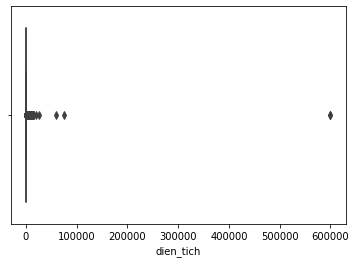

In [60]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=rsht_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


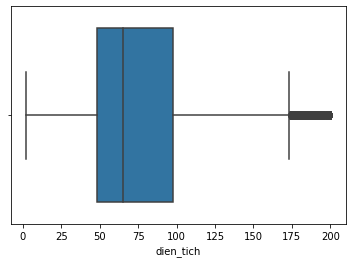

In [61]:
rsht_data_new = outliner_remove(rsht_data_new, 'dien_tich')
rsht_data_new = rsht_data_new[rsht_data_new.dien_tich > 0]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['dien_tich'])

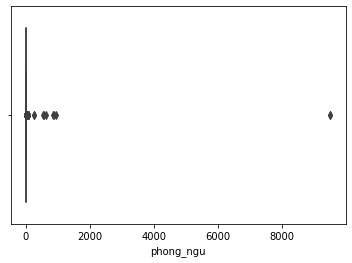

In [62]:
sns.boxplot(x=rsht_data_new['phong_ngu'])

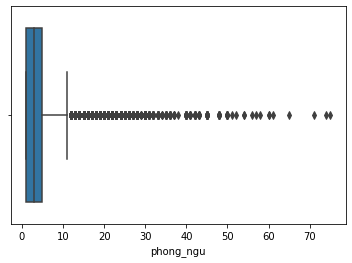

In [63]:
rsht_data_new = rsht_data_new[rsht_data_new.phong_ngu <200]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['phong_ngu'])

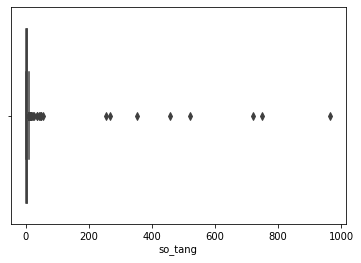

In [64]:
sns.boxplot(x=rsht_data_new['so_tang'])

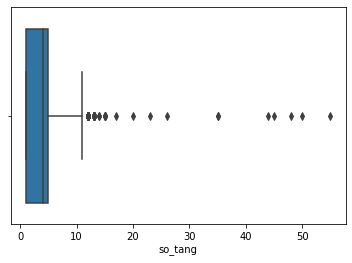

In [65]:
rsht_data_new = rsht_data_new[rsht_data_new.so_tang <200]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['so_tang'])

In [66]:
rsht_data_new['the_loai'] = 'Road'

In [67]:
rsht_data_new

dien_tich  phong_ngu  so_tang  so_do       ten_quan huong_nha  \
0           69.0        9.0      7.0     c√≥   Qu·∫≠n Ba ƒê√¨nh  ƒê√¥ng nam   
1           50.0        1.0      5.0  kh√¥ng   Qu·∫≠n Ba ƒê√¨nh       KXƒê   
2           72.0        5.0      5.0     c√≥   Qu·∫≠n Ba ƒê√¨nh       KXƒê   
3           50.0        3.0      5.0  kh√¥ng   Qu·∫≠n Ba ƒê√¨nh       KXƒê   
4           50.0        3.0      5.0  kh√¥ng   Qu·∫≠n Ba ƒê√¨nh       KXƒê   
...          ...        ...      ...    ...            ...       ...   
55444       80.0        3.0      3.0     c√≥  Huy·ªán M√™ Linh       KXƒê   
55445       80.0        3.0      3.0     c√≥  Huy·ªán M√™ Linh       KXƒê   
55446       80.0        3.0      3.0     c√≥  Huy·ªán M√™ Linh       KXƒê   
55447       70.0        1.0      1.0     c√≥  Huy·ªán M√™ Linh       KXƒê   
55448       70.0        2.0      1.0     c√≥  Huy·ªán M√™ Linh       KXƒê   

       do_rong_duong     do_rong_duong_ml noi_that      gia the_loai  
0                0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng   ƒë·∫ßy ƒë·ªß  21000.0     Road  
1                0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng  25000.0     Road  
2               60.0   Ng√µ 4 √¥ t√¥ tr·ªü l√™n    tr·ªëng  12000.0     Road  
3                4.0           Ng√µ 1 √¥ t√¥    tr·ªëng  16000.0     Road  
4                4.0           Ng√µ 1 √¥ t√¥    tr·ªëng  16000.0     Road  
...              ...                  ...      ...      ...      ...  
55444            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4500.0     Road  
55445            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4500.0     Road  
55446           10.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4950.0     Road  
55447            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   2400.0     Road  
55448            5.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4000.0     Road  

[55449 rows x 11 columns]

In [68]:
# cols = ['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','do_rong_duong','do_rong_duong_ml','noi_that','gia']
# for i in cols:
#   sns.displot(data=rsht_data_new, x=i, kde=True)

#T·ªïng h·ª£p

In [69]:
data = pd.concat([at_data_new, lt_data_new, rsht_data_new])
mask = data['gia'].apply(lambda x: x.is_integer())
data['gia'] = data['gia'].astype(int)
data = data[mask]

data.reset_index(drop=True, inplace=True)
data

dien_tich  phong_ngu  so_tang so_do       ten_quan huong_nha  \
0            75.0        2.0      1.0    c√≥   Qu·∫≠n Ba ƒê√¨nh       KXƒê   
1           115.0        3.0      1.0    c√≥   Qu·∫≠n Ba ƒê√¨nh   T√¢y B·∫Øc   
2           100.0        2.0      1.0    c√≥   Qu·∫≠n Ba ƒê√¨nh       Nam   
3            30.0        2.0      2.0    c√≥   Qu·∫≠n Ba ƒê√¨nh       KXƒê   
4            72.0        2.0      3.0    c√≥   Qu·∫≠n Ba ƒê√¨nh      ƒê√¥ng   
...           ...        ...      ...   ...            ...       ...   
103356       80.0        3.0      3.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
103357       80.0        3.0      3.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
103358       80.0        3.0      3.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
103359       70.0        1.0      1.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
103360       70.0        2.0      1.0    c√≥  Huy·ªán M√™ Linh       KXƒê   

        do_rong_duong     do_rong_duong_ml noi_that    gia   the_loai  
0                 0.0                kh√¥ng    tr·ªëng   6300  Apartment  
1                 0.0                kh√¥ng    tr·ªëng  10250  Apartment  
2                 0.0                kh√¥ng    tr·ªëng   2600  Apartment  
3                 0.0                kh√¥ng    tr·ªëng   3500  Apartment  
4                 0.0                kh√¥ng    tr·ªëng   1750  Apartment  
...               ...                  ...      ...    ...        ...  
103356            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4500       Road  
103357            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4500       Road  
103358           10.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4950       Road  
103359            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   2400       Road  
103360            5.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4000       Road  

[103361 rows x 11 columns]

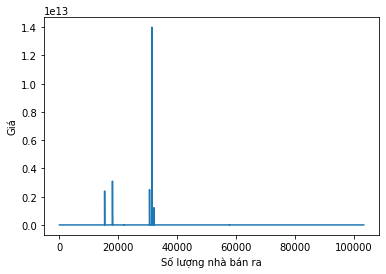

In [70]:
plt.plot(data['gia'])
plt.ylabel('Gi√°')
plt.xlabel("S·ªë l∆∞·ª£ng nh√† b√°n ra")
plt.show()

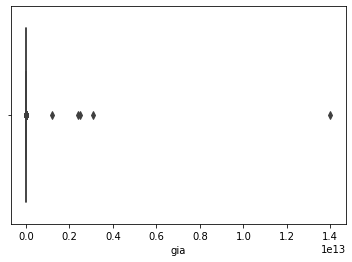

In [71]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
plt.rcParams["figure.figsize"] = (6,4)
sns.boxplot(x=data['gia'])

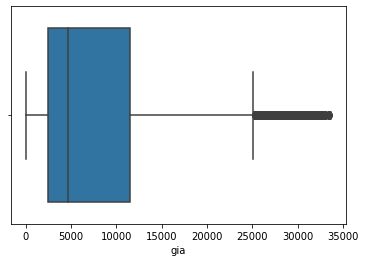

In [72]:
data = outliner_remove(data, 'gia')
data = data[data.gia >0]
data.reset_index(drop=True, inplace=True)
sns.boxplot(x=data['gia'])

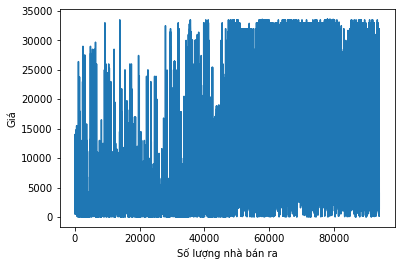

In [73]:
plt.plot(data.gia)
plt.ylabel('Gi√°')
plt.xlabel("S·ªë l∆∞·ª£ng nh√† b√°n ra")
plt.show()

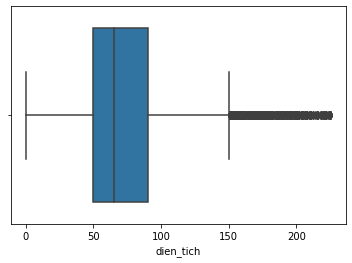

In [74]:
sns.boxplot(x=data['dien_tich'])

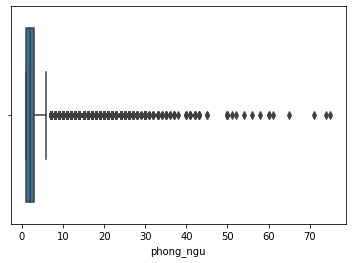

In [75]:
sns.boxplot(x=data['phong_ngu'])

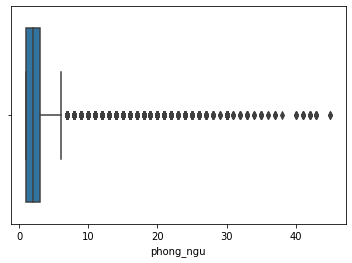

In [76]:
data = data[data.phong_ngu <50]
data.reset_index(drop=True, inplace=True)
sns.boxplot(x=data['phong_ngu'])

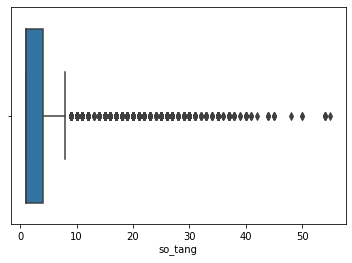

In [77]:
sns.boxplot(x=data['so_tang'])

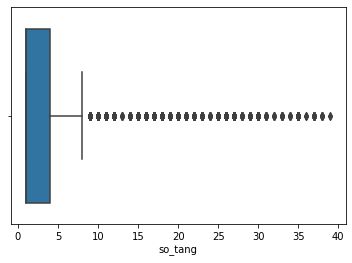

In [78]:
data = data[data.so_tang <40]
data.reset_index(drop=True, inplace=True)
sns.boxplot(x=data['so_tang'])

In [79]:
#data.to_csv("/content/drive/MyDrive/Data DA/data_final.csv")

#Visualize

In [80]:
df = pd.read_csv("/content/drive/MyDrive/Data DA/data_final.csv", encoding='utf8').iloc[:, 1:]
df

dien_tich  phong_ngu  so_tang so_do       ten_quan huong_nha  \
0           75.0        2.0      1.0    c√≥   Qu·∫≠n Ba ƒê√¨nh       KXƒê   
1          115.0        3.0      1.0    c√≥   Qu·∫≠n Ba ƒê√¨nh   T√¢y B·∫Øc   
2          100.0        2.0      1.0    c√≥   Qu·∫≠n Ba ƒê√¨nh       Nam   
3           30.0        2.0      2.0    c√≥   Qu·∫≠n Ba ƒê√¨nh       KXƒê   
4           72.0        2.0      3.0    c√≥   Qu·∫≠n Ba ƒê√¨nh      ƒê√¥ng   
...          ...        ...      ...   ...            ...       ...   
93940       80.0        3.0      3.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
93941       80.0        3.0      3.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
93942       80.0        3.0      3.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
93943       70.0        1.0      1.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
93944       70.0        2.0      1.0    c√≥  Huy·ªán M√™ Linh       KXƒê   

       do_rong_duong     do_rong_duong_ml noi_that    gia   the_loai  
0                0.0                kh√¥ng    tr·ªëng   6300  Apartment  
1                0.0                kh√¥ng    tr·ªëng  10250  Apartment  
2                0.0                kh√¥ng    tr·ªëng   2600  Apartment  
3                0.0                kh√¥ng    tr·ªëng   3500  Apartment  
4                0.0                kh√¥ng    tr·ªëng   1750  Apartment  
...              ...                  ...      ...    ...        ...  
93940            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4500       Road  
93941            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4500       Road  
93942           10.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4950       Road  
93943            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   2400       Road  
93944            5.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4000       Road  

[93945 rows x 11 columns]

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93945 entries, 0 to 93944
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         93945 non-null  float64
 1   phong_ngu         93945 non-null  float64
 2   so_tang           93945 non-null  float64
 3   so_do             93945 non-null  object 
 4   ten_quan          93945 non-null  object 
 5   huong_nha         93945 non-null  object 
 6   do_rong_duong     93945 non-null  float64
 7   do_rong_duong_ml  93945 non-null  object 
 8   noi_that          93945 non-null  object 
 9   gia               93945 non-null  int64  
 10  the_loai          93945 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 7.9+ MB


In [82]:
loai_nha = df['the_loai'].value_counts()
loai_nha.values

array([46156, 29323, 18466])

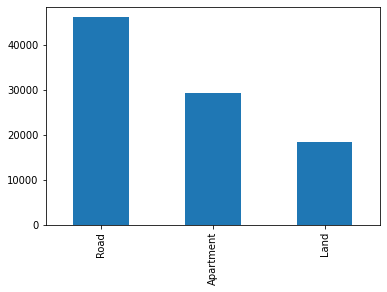

In [83]:
df['the_loai'].value_counts().plot.bar()

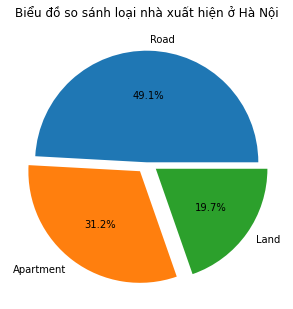

In [84]:
plt.figure(figsize = (5,15))
plt.title('Bi·ªÉu ƒë·ªì so s√°nh lo·∫°i nh√† xu·∫•t hi·ªán ·ªü H√† N·ªôi')
plt.pie(loai_nha.values, labels = loai_nha.index, autopct="%1.1f%%",explode=[0, 0.1, 0.1])
plt.show()

In [85]:
rooms_area = df[['the_loai', 'dien_tich', 'phong_ngu']].sort_values(by = 'dien_tich')
rooms_area.reset_index(drop=True, inplace=True)
rooms_area

the_loai  dien_tich  phong_ngu
0           Land       0.11        1.0
1           Land       0.14        1.0
2           Land       1.00        1.0
3           Land       1.00        1.0
4      Apartment       1.00        1.0
...          ...        ...        ...
93940       Land     225.00        1.0
93941       Land     225.00        1.0
93942       Land     225.00        1.0
93943       Land     225.00        1.0
93944       Land     225.00        1.0

[93945 rows x 3 columns]

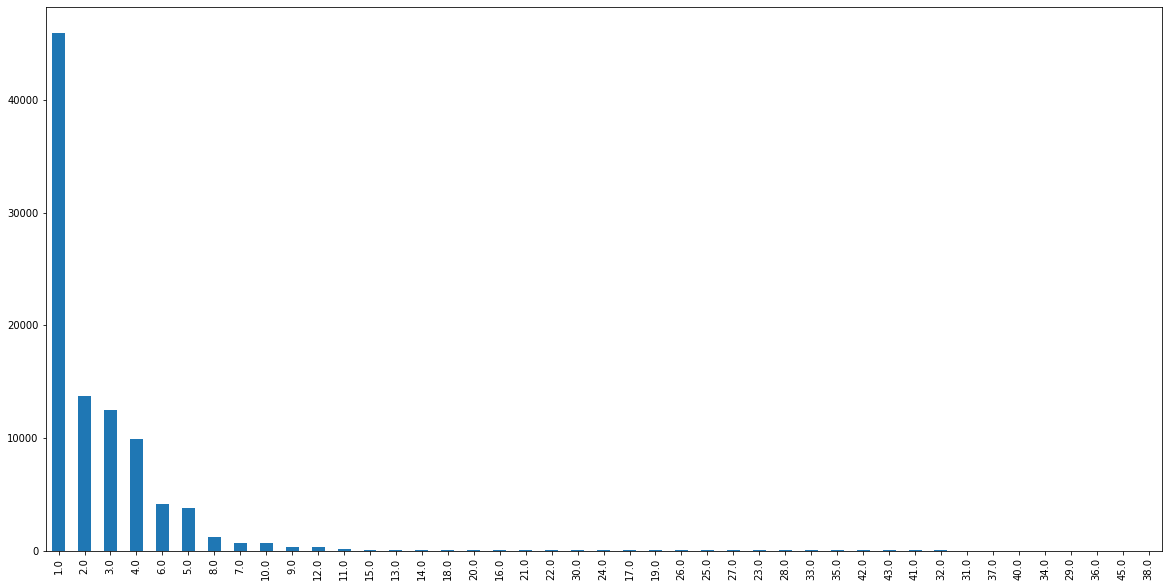

In [86]:
plt.figure(figsize = (20,10))
df['phong_ngu'].value_counts().plot.bar()

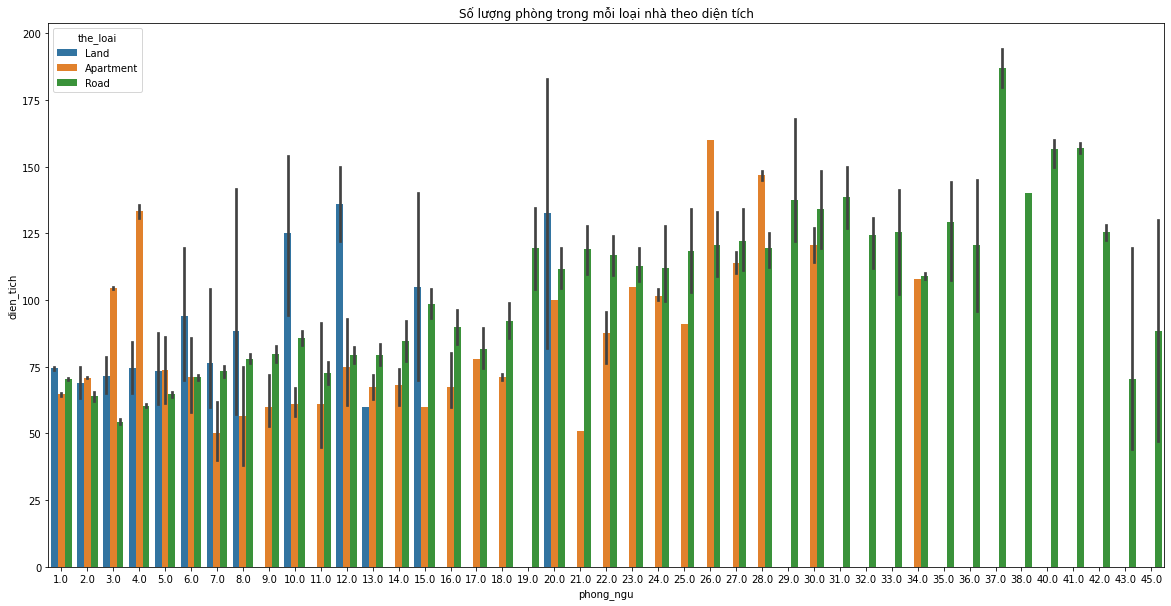

In [87]:
plt.figure(figsize = (20,10))
plt.title('S·ªë l∆∞·ª£ng ph√≤ng trong m·ªói lo·∫°i nh√† theo di·ªán t√≠ch')
sns.barplot(data = rooms_area, x = 'phong_ngu', y = 'dien_tich', hue = 'the_loai')
plt.show()

In [88]:
gia_avg = df[['the_loai', 'gia']].groupby('the_loai').mean().reset_index()
gia_avg

the_loai           gia
0  Apartment   2677.726222
1       Land   4438.549821
2       Road  12747.436975

In [89]:
rooms_price = df[['the_loai', 'gia', 'phong_ngu']].sort_values(by = 'gia')
rooms_price.reset_index(drop=True, inplace=True)
rooms_price

the_loai    gia  phong_ngu
0           Road      1        4.0
1           Land      1        1.0
2      Apartment      1        1.0
3      Apartment      1        2.0
4           Road      1       20.0
...          ...    ...        ...
93940       Road  33600        1.0
93941       Road  33600        3.0
93942       Road  33600        1.0
93943       Road  33600        1.0
93944       Road  33600        8.0

[93945 rows x 3 columns]

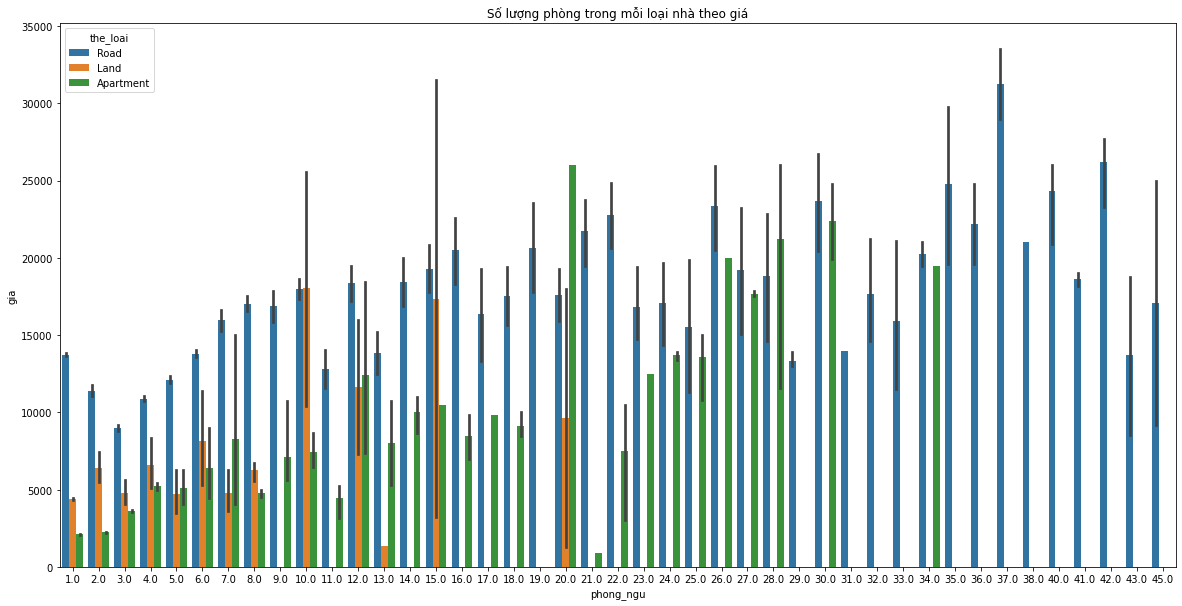

In [90]:
plt.figure(figsize = (20,10))
plt.title('S·ªë l∆∞·ª£ng ph√≤ng trong m·ªói lo·∫°i nh√† theo gi√°')
sns.barplot(data = rooms_price, x = 'phong_ngu', y = 'gia', hue = 'the_loai')
plt.show()

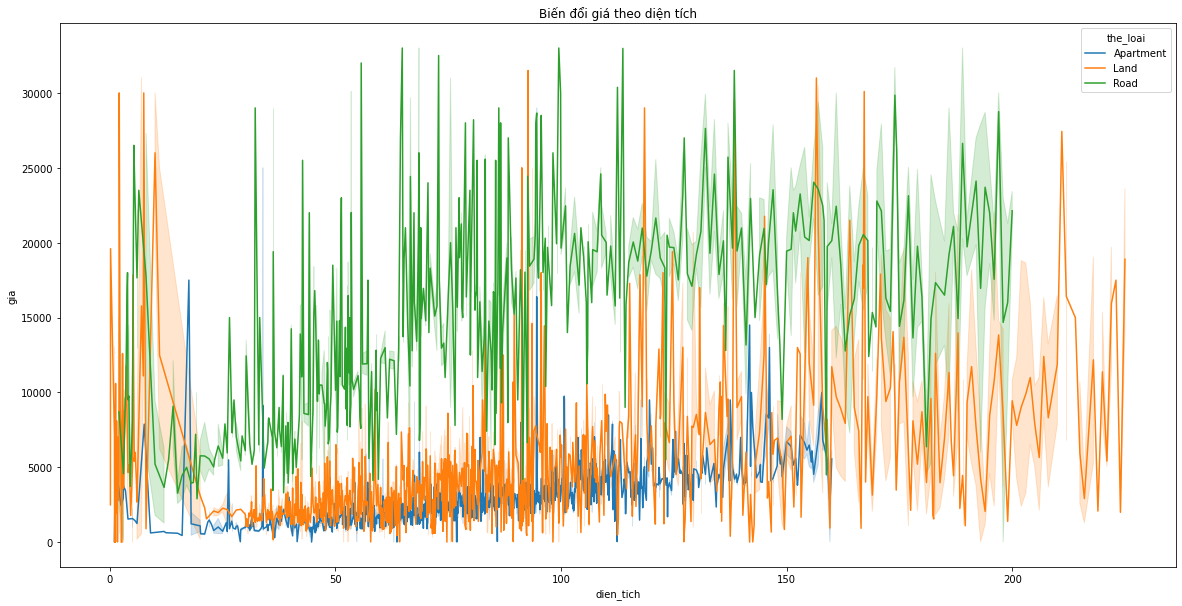

In [91]:
plt.figure(figsize = (20, 10))
plt.title('Bi·∫øn ƒë·ªïi gi√° theo di·ªán t√≠ch')
sns.lineplot(data = df, x = 'dien_tich', y = 'gia', hue = 'the_loai')
plt.show()

In [92]:
ten_quan_group = df.groupby(['ten_quan'])['gia'].mean().reset_index()
ten_quan_group = df.sort_values(by = 'gia')

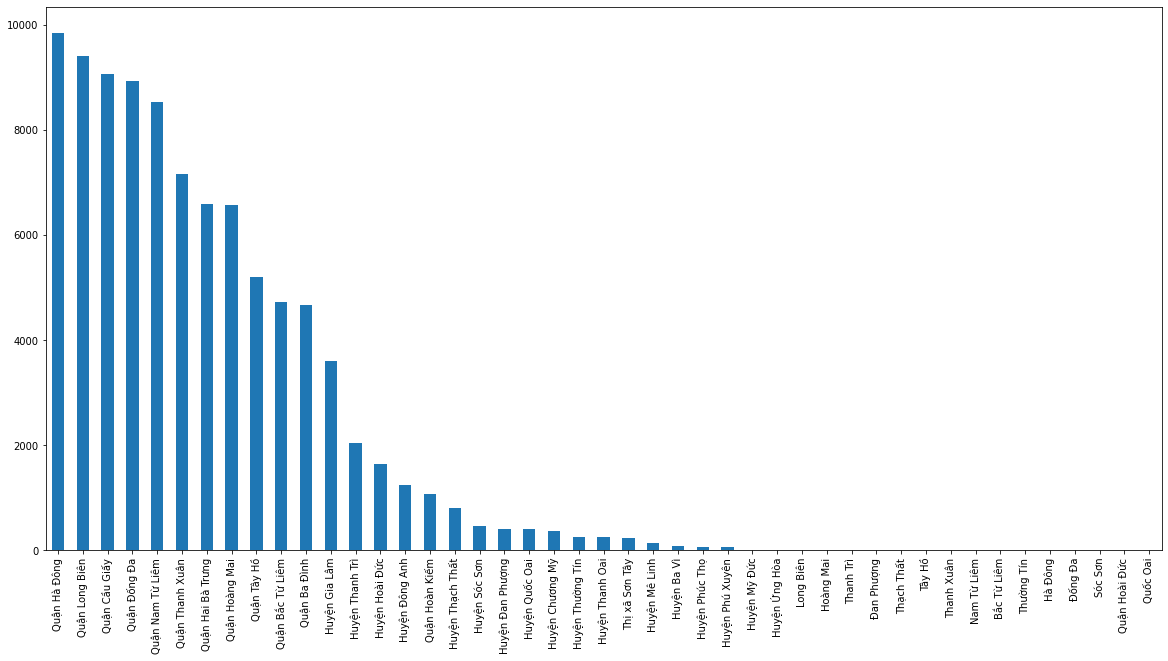

In [93]:
plt.figure(figsize = (20,10))
df['ten_quan'].value_counts().plot.bar()

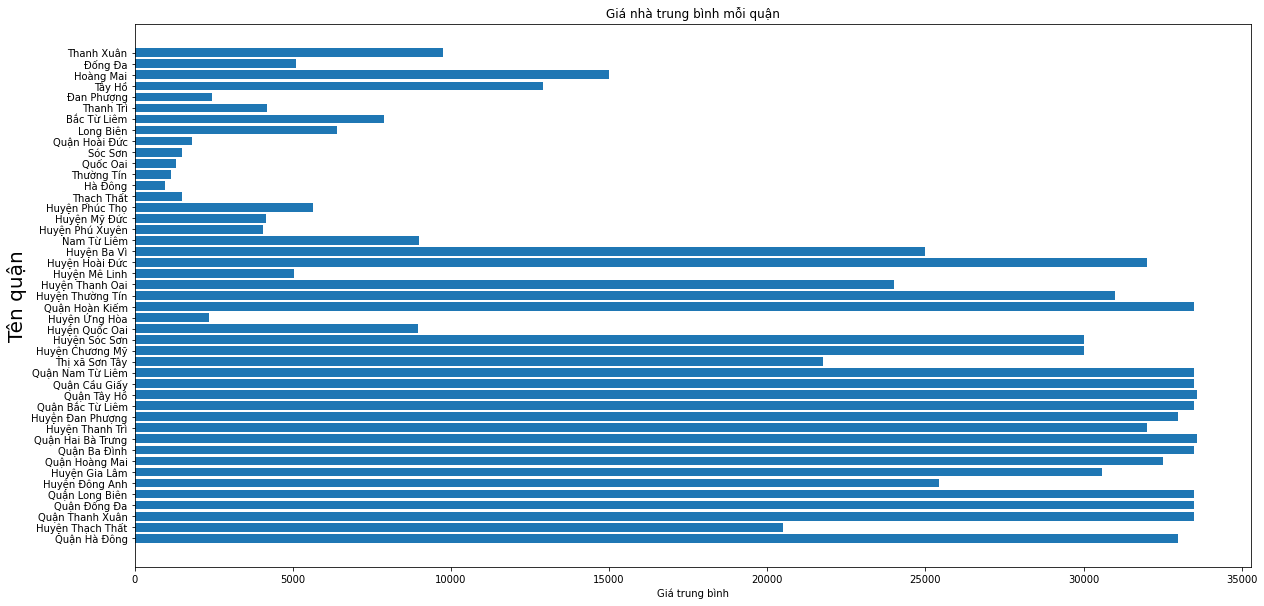

In [94]:
plt.figure(figsize=(20,10))
plt.barh(ten_quan_group['ten_quan'], ten_quan_group['gia'])
plt.title("Gi√° nh√† trung b√¨nh m·ªói qu·∫≠n")
plt.xlabel("Gi√° trung b√¨nh")
plt.ylabel("T√™n qu·∫≠n", fontsize = 20)
plt.show()

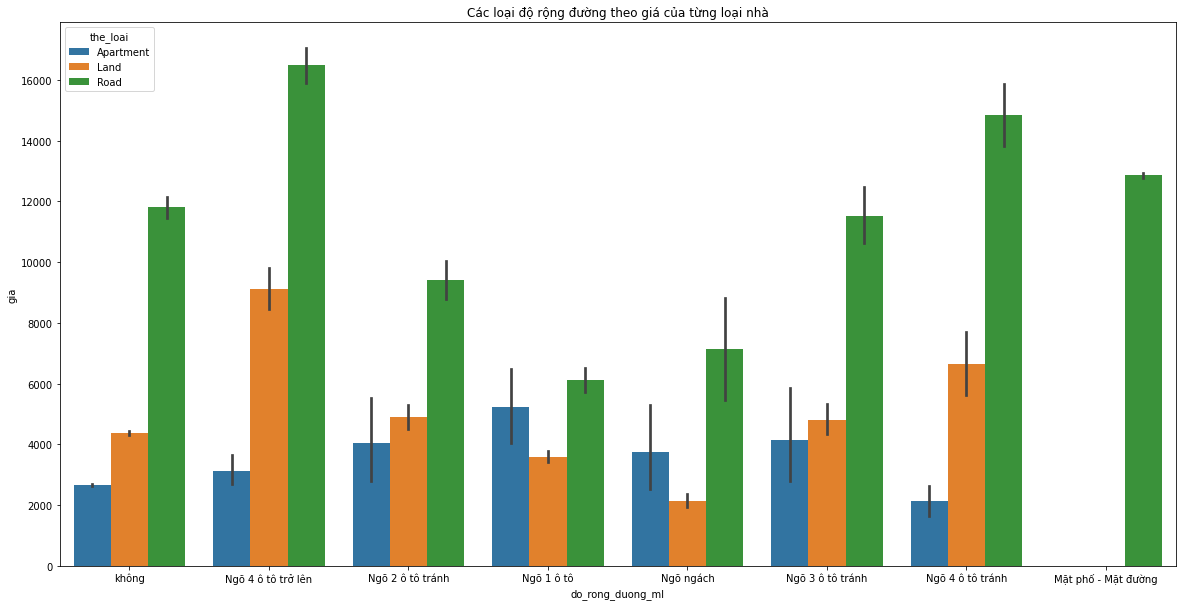

In [95]:
plt.figure(figsize = (20,10))
plt.title("C√°c lo·∫°i ƒë·ªô r·ªông ƒë∆∞·ªùng theo gi√° c·ªßa t·ª´ng lo·∫°i nh√†")
sns.barplot(data = df, x = 'do_rong_duong_ml', y = 'gia', hue = 'the_loai')
plt.show()

In [96]:
funi_price = df[['the_loai', 'gia', 'noi_that']].sort_values(by = 'gia')
funi_price.reset_index(drop=True, inplace=True)
funi_price

the_loai    gia noi_that
0           Road      1    tr·ªëng
1           Land      1    tr·ªëng
2      Apartment      1    tr·ªëng
3      Apartment      1    tr·ªëng
4           Road      1    tr·ªëng
...          ...    ...      ...
93940       Road  33600    tr·ªëng
93941       Road  33600    tr·ªëng
93942       Road  33600    tr·ªëng
93943       Road  33600    tr·ªëng
93944       Road  33600    tr·ªëng

[93945 rows x 3 columns]

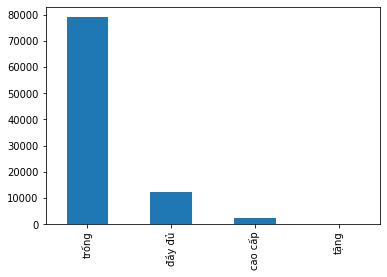

In [97]:
df['noi_that'].value_counts().plot.bar()

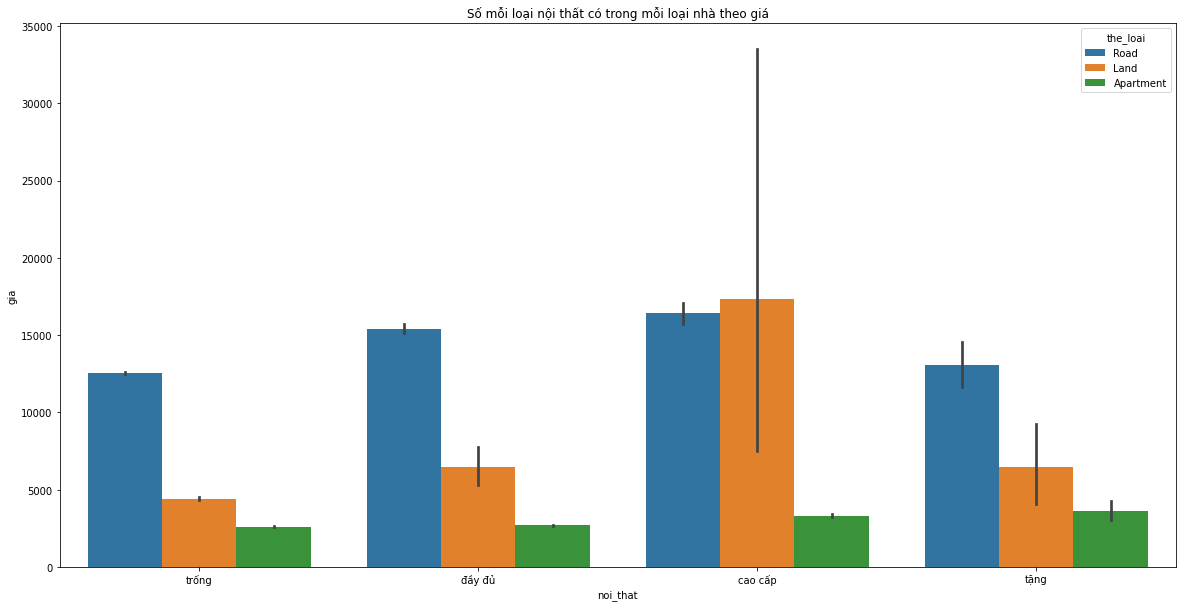

In [98]:
plt.figure(figsize = (20,10))
plt.title('S·ªë m·ªói lo·∫°i n·ªôi th·∫•t c√≥ trong m·ªói lo·∫°i nh√† theo gi√°')
sns.barplot(data = funi_price, x = 'noi_that', y = 'gia', hue = 'the_loai')
plt.show()

In [99]:
sodo_price = df[['the_loai', 'gia', 'so_do']].sort_values(by = 'gia')
sodo_price.reset_index(drop=True, inplace=True)
sodo_price

the_loai    gia  so_do
0           Road      1     c√≥
1           Land      1     c√≥
2      Apartment      1  kh√¥ng
3      Apartment      1  kh√¥ng
4           Road      1  kh√¥ng
...          ...    ...    ...
93940       Road  33600  kh√¥ng
93941       Road  33600     c√≥
93942       Road  33600     c√≥
93943       Road  33600  kh√¥ng
93944       Road  33600     c√≥

[93945 rows x 3 columns]

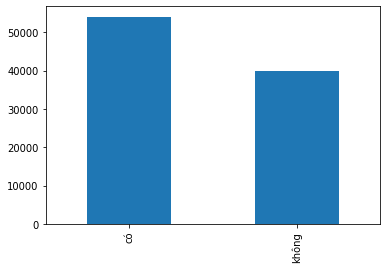

In [100]:
df['so_do'].value_counts().plot.bar()

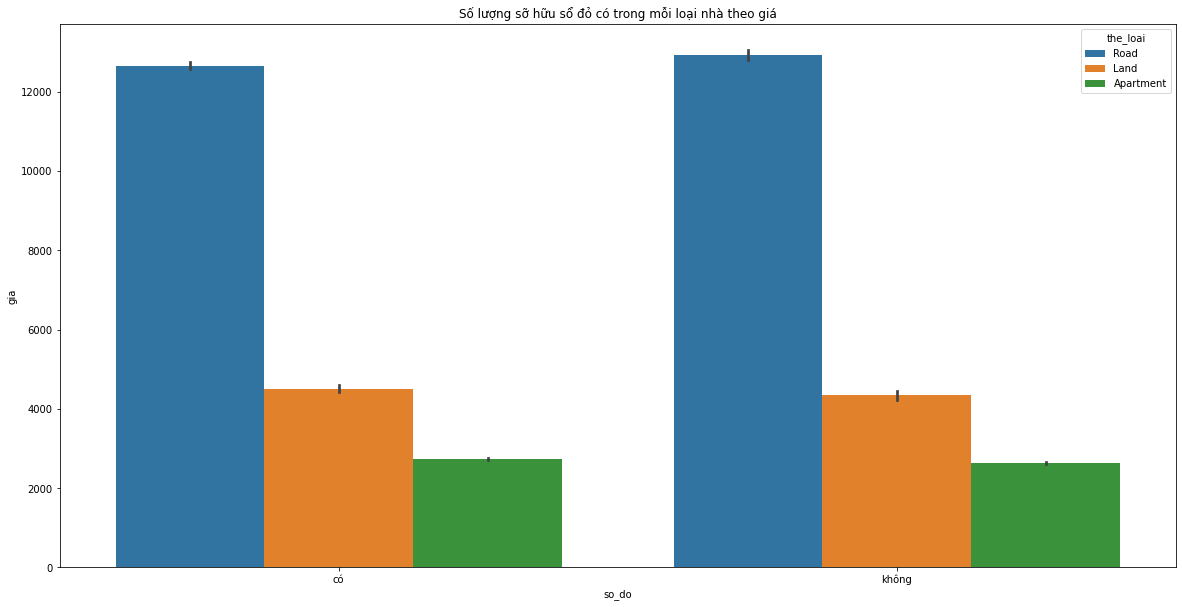

In [101]:
plt.figure(figsize = (20,10))
plt.title('S·ªë l∆∞·ª£ng s·ª° h·ªØu s·ªï ƒë·ªè c√≥ trong m·ªói lo·∫°i nh√† theo gi√°')
sns.barplot(data = sodo_price, x = 'so_do', y = 'gia', hue = 'the_loai')
plt.show()

#Set up ƒë·ªÉ Train

In [102]:
data = pd.read_csv("/content/drive/MyDrive/Data DA/data_final.csv", encoding='utf8').iloc[:, 1:]
data

dien_tich  phong_ngu  so_tang so_do       ten_quan huong_nha  \
0           75.0        2.0      1.0    c√≥   Qu·∫≠n Ba ƒê√¨nh       KXƒê   
1          115.0        3.0      1.0    c√≥   Qu·∫≠n Ba ƒê√¨nh   T√¢y B·∫Øc   
2          100.0        2.0      1.0    c√≥   Qu·∫≠n Ba ƒê√¨nh       Nam   
3           30.0        2.0      2.0    c√≥   Qu·∫≠n Ba ƒê√¨nh       KXƒê   
4           72.0        2.0      3.0    c√≥   Qu·∫≠n Ba ƒê√¨nh      ƒê√¥ng   
...          ...        ...      ...   ...            ...       ...   
93940       80.0        3.0      3.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
93941       80.0        3.0      3.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
93942       80.0        3.0      3.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
93943       70.0        1.0      1.0    c√≥  Huy·ªán M√™ Linh       KXƒê   
93944       70.0        2.0      1.0    c√≥  Huy·ªán M√™ Linh       KXƒê   

       do_rong_duong     do_rong_duong_ml noi_that    gia   the_loai  
0                0.0                kh√¥ng    tr·ªëng   6300  Apartment  
1                0.0                kh√¥ng    tr·ªëng  10250  Apartment  
2                0.0                kh√¥ng    tr·ªëng   2600  Apartment  
3                0.0                kh√¥ng    tr·ªëng   3500  Apartment  
4                0.0                kh√¥ng    tr·ªëng   1750  Apartment  
...              ...                  ...      ...    ...        ...  
93940            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4500       Road  
93941            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4500       Road  
93942           10.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4950       Road  
93943            0.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   2400       Road  
93944            5.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng    tr·ªëng   4000       Road  

[93945 rows x 11 columns]

In [103]:
print("Gi√° l·ªõn nh·∫•t:", data.gia.max(),
      "\nGi√° nh·ªè nh·∫•t:", data.gia.min())

cols =['so_do','ten_quan','huong_nha','do_rong_duong_ml','noi_that','the_loai']
for i in cols:
  print("\n",i," : ",data[i].unique())

Gi√° l·ªõn nh·∫•t: 33600 
Gi√° nh·ªè nh·∫•t: 1

 so_do  :  ['c√≥' 'kh√¥ng']

 ten_quan  :  ['Qu·∫≠n Ba ƒê√¨nh' 'Qu·∫≠n H√† ƒê√¥ng' 'Huy·ªán Ba V√¨' 'Huy·ªán ƒêan Ph∆∞·ª£ng'
 'Huy·ªán Ho√†i ƒê·ª©c' 'Qu·∫≠n Ho√†i ƒê·ª©c' 'Huy·ªán Qu·ªëc Oai' 'Huy·ªán Ch∆∞∆°ng M·ªπ'
 'Huy·ªán Thanh Oai' 'Huy·ªán Th∆∞·ªùng T√≠n' 'Qu·∫≠n Ho√†n Ki·∫øm' 'Qu·∫≠n T√¢y H·ªì'
 'Qu·∫≠n Long Bi√™n' 'Qu·∫≠n C·∫ßu Gi·∫•y' 'Qu·∫≠n ƒê·ªëng ƒêa' 'Qu·∫≠n Hai B√† Tr∆∞ng'
 'Qu·∫≠n Ho√†ng Mai' 'Qu·∫≠n Thanh Xu√¢n' 'Huy·ªán S√≥c S∆°n' 'Huy·ªán ƒê√¥ng Anh'
 'Huy·ªán Gia L√¢m' 'Qu·∫≠n Nam T·ª´ Li√™m' 'Huy·ªán Thanh Tr√¨' 'Qu·∫≠n B·∫Øc T·ª´ Li√™m'
 'Huy·ªán M√™ Linh' 'H√† ƒê√¥ng' 'Th·ªã x√£ S∆°n T√¢y' 'Huy·ªán Ph√∫c Th·ªç' 'ƒêan Ph∆∞·ª£ng'
 'Qu·ªëc Oai' 'Huy·ªán Th·∫°ch Th·∫•t' 'Th·∫°ch Th·∫•t' 'Th∆∞·ªùng T√≠n' 'Huy·ªán ·ª®ng H√≤a'
 'Huy·ªán M·ªπ ƒê·ª©c' 'T√¢y H·ªì' 'Long Bi√™n' 'ƒê·ªëng ƒêa' 'Ho√†ng Mai' 'Thanh Xu√¢n'
 'S√≥c S∆°n' 'Nam T·ª´ Li√™m' 'Thanh Tr√¨' 'B·∫Øc T·ª´ Li√™m' 'Huy·ªán Ph√∫ Xuy√™n']

 huong_nha  :  ['KXƒê' '

In [104]:
dict_so_do = {
    "so_do":{
        "kh√¥ng":1.0,
        "c√≥":2.0
    }}

dict_the_loai = {
    "the_loai":{
        "Apartment":1.0,
        "Land":2.0,
        "Road":3.0
    }}

dict_noi_that = {
    "noi_that":{
        "tr·ªëng":1.0,
        "cao c·∫•p":2.0,
        "ƒë·∫ßy ƒë·ªß":3.0,
        "t·∫∑ng": 4.0
    }}

dict_ten_quan = dict(enumerate(data.ten_quan.unique()))
dict_ten_quan = {v: k for k, v in dict_ten_quan.items()}
dict_ten_quan = {
    'ten_quan': dict_ten_quan
}

dict_huong_nha = dict(enumerate(data.huong_nha.unique()))
dict_huong_nha = {v: k for k, v in dict_huong_nha.items()}
dict_huong_nha = {
    'huong_nha': dict_huong_nha
}

dict_do_rong_duong_ml = dict(enumerate(data.do_rong_duong_ml.unique()))
dict_do_rong_duong_ml = {v: k for k, v in dict_do_rong_duong_ml.items()}
dict_do_rong_duong_ml = {
    'do_rong_duong_ml': dict_do_rong_duong_ml
}

for i in [dict_so_do, dict_the_loai, dict_noi_that, dict_ten_quan, dict_huong_nha, dict_do_rong_duong_ml]:
    data.replace(i,inplace=True)

In [105]:
print("so_do: ",data.so_do.unique())
print("the_loai: ",data.the_loai.unique())
print("ten_quan: ",data.ten_quan.unique())
print("huong_nha: ",data.huong_nha.unique())
print("noi_that: ",data.noi_that.unique())
print("do_rong_duong_ml: ",data.do_rong_duong_ml.unique())

so_do:  [2. 1.]
the_loai:  [1. 2. 3.]
ten_quan:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
huong_nha:  [0 1 2 3 4 5 6 7 8 9]
noi_that:  [1. 2. 3. 4.]
do_rong_duong_ml:  [0 1 2 3 4 5 6 7]


In [106]:
data

dien_tich  phong_ngu  so_tang  so_do  ten_quan  huong_nha  \
0           75.0        2.0      1.0    2.0         0          0   
1          115.0        3.0      1.0    2.0         0          1   
2          100.0        2.0      1.0    2.0         0          2   
3           30.0        2.0      2.0    2.0         0          0   
4           72.0        2.0      3.0    2.0         0          3   
...          ...        ...      ...    ...       ...        ...   
93940       80.0        3.0      3.0    2.0        24          0   
93941       80.0        3.0      3.0    2.0        24          0   
93942       80.0        3.0      3.0    2.0        24          0   
93943       70.0        1.0      1.0    2.0        24          0   
93944       70.0        2.0      1.0    2.0        24          0   

       do_rong_duong  do_rong_duong_ml  noi_that    gia  the_loai  
0                0.0                 0       1.0   6300       1.0  
1                0.0                 0       1.0  10250       1.0  
2                0.0                 0       1.0   2600       1.0  
3                0.0                 0       1.0   3500       1.0  
4                0.0                 0       1.0   1750       1.0  
...              ...               ...       ...    ...       ...  
93940            0.0                 7       1.0   4500       3.0  
93941            0.0                 7       1.0   4500       3.0  
93942           10.0                 7       1.0   4950       3.0  
93943            0.0                 7       1.0   2400       3.0  
93944            5.0                 7       1.0   4000       3.0  

[93945 rows x 11 columns]

#Train b·∫±ng LinearRegression

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

names = ['dien_tich','phong_ngu','so_tang','so_do','ten_quan','huong_nha','noi_that','do_rong_duong','do_rong_duong_ml','the_loai']
x = data[names]
y = data['gia']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
data_set = x_train, x_test, y_train, y_test
for i in data_set:
  i.reset_index(drop=True, inplace=True)

In [108]:
Linreg = LinearRegression().fit(x_train, y_train)
y_predict=Linreg.predict(x_test)
y_predict

array([ 5634.93935697,  9720.11686649,  6099.47341573, ...,
       10774.42661712,  6207.20955058,  9968.53713647])

In [109]:
y_test

0         3634
1        12900
2           57
3        14000
4        12000
         ...  
18784    26000
18785     4800
18786    13900
18787     9500
18788     6000
Name: gia, Length: 18789, dtype: int64

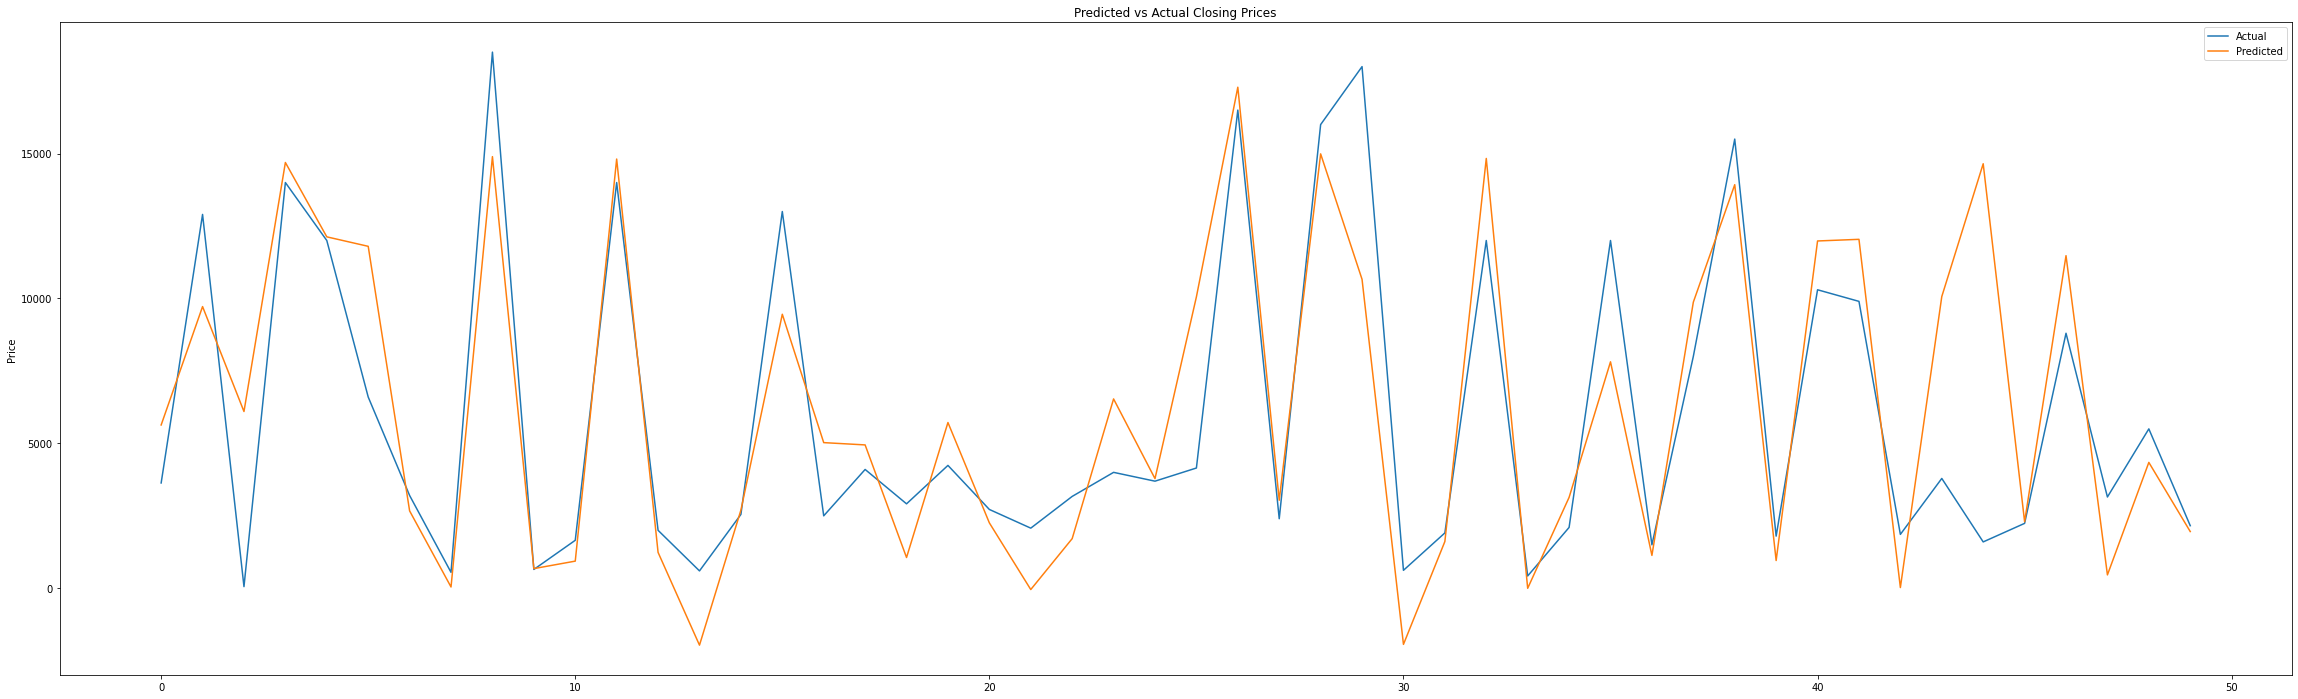

In [110]:
fig = plt.figure() 
fig.set_size_inches(40, 12)
plt.plot(y_test[:50], label='Actual')
plt.plot(y_predict[:50].tolist(), label='Predicted')
plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()

In [111]:
from sklearn.metrics import r2_score 
print ("r2 model: ", r2_score(y_test, y_predict))

r2 model:  0.4987387648665679


#Train b·∫±ng DNN

In [112]:
from tensorflow import keras

model = keras.models.Sequential(name="DNN_model")

model.add(keras.layers.Dense(10, activation='relu', input_shape=(10,)))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))

for i,layer in enumerate(model.layers):
  layer._name = 'layer_' + str(i)

model.summary()

Model: "DNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 10)                110       
                                                                 
 layer_1 (Dense)             (None, 10)                110       
                                                                 
 layer_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


In [113]:
opt = keras.optimizers.Adam(learning_rate = 1e-3, decay= 1e-6)

model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
2114/2114 [==============================] - 6s 2ms/step - loss: 63406924.0000 - accuracy: 8.8705e-05 - val_loss: 43640428.0000 - val_accuracy: 1.3305e-04
Epoch 2/30
2114/2114 [==============================] - 4s 2ms/step - loss: 38403996.0000 - accuracy: 8.8705e-05 - val_loss: 34776772.0000 - val_accuracy: 1.3305e-04
Epoch 3/30
2114/2114 [==============================] - 4s 2ms/step - loss: 33738376.0000 - accuracy: 8.8705e-05 - val_loss: 32744320.0000 - val_accuracy: 1.3305e-04
Epoch 4/30
2114/2114 [==============================] - 4s 2ms/step - loss: 32358198.0000 - accuracy: 8.8705e-05 - val_loss: 31809320.0000 - val_accuracy: 1.3305e-04
Epoch 5/30
2114/2114 [==============================] - 4s 2ms/step - loss: 31623558.0000 - accuracy: 8.8705e-05 - val_loss: 31215654.0000 - val_accuracy: 1.3305e-04
Epoch 6/30
2114/2114 [==============================] - 4s 2ms/step - loss: 31122762.0000 - accuracy: 8.8705e-05 - val_loss: 30752284.0000 - val_accuracy: 1.3305e-04
Epoc

In [114]:
y_predict= model.predict(x_test, batch_size=1)

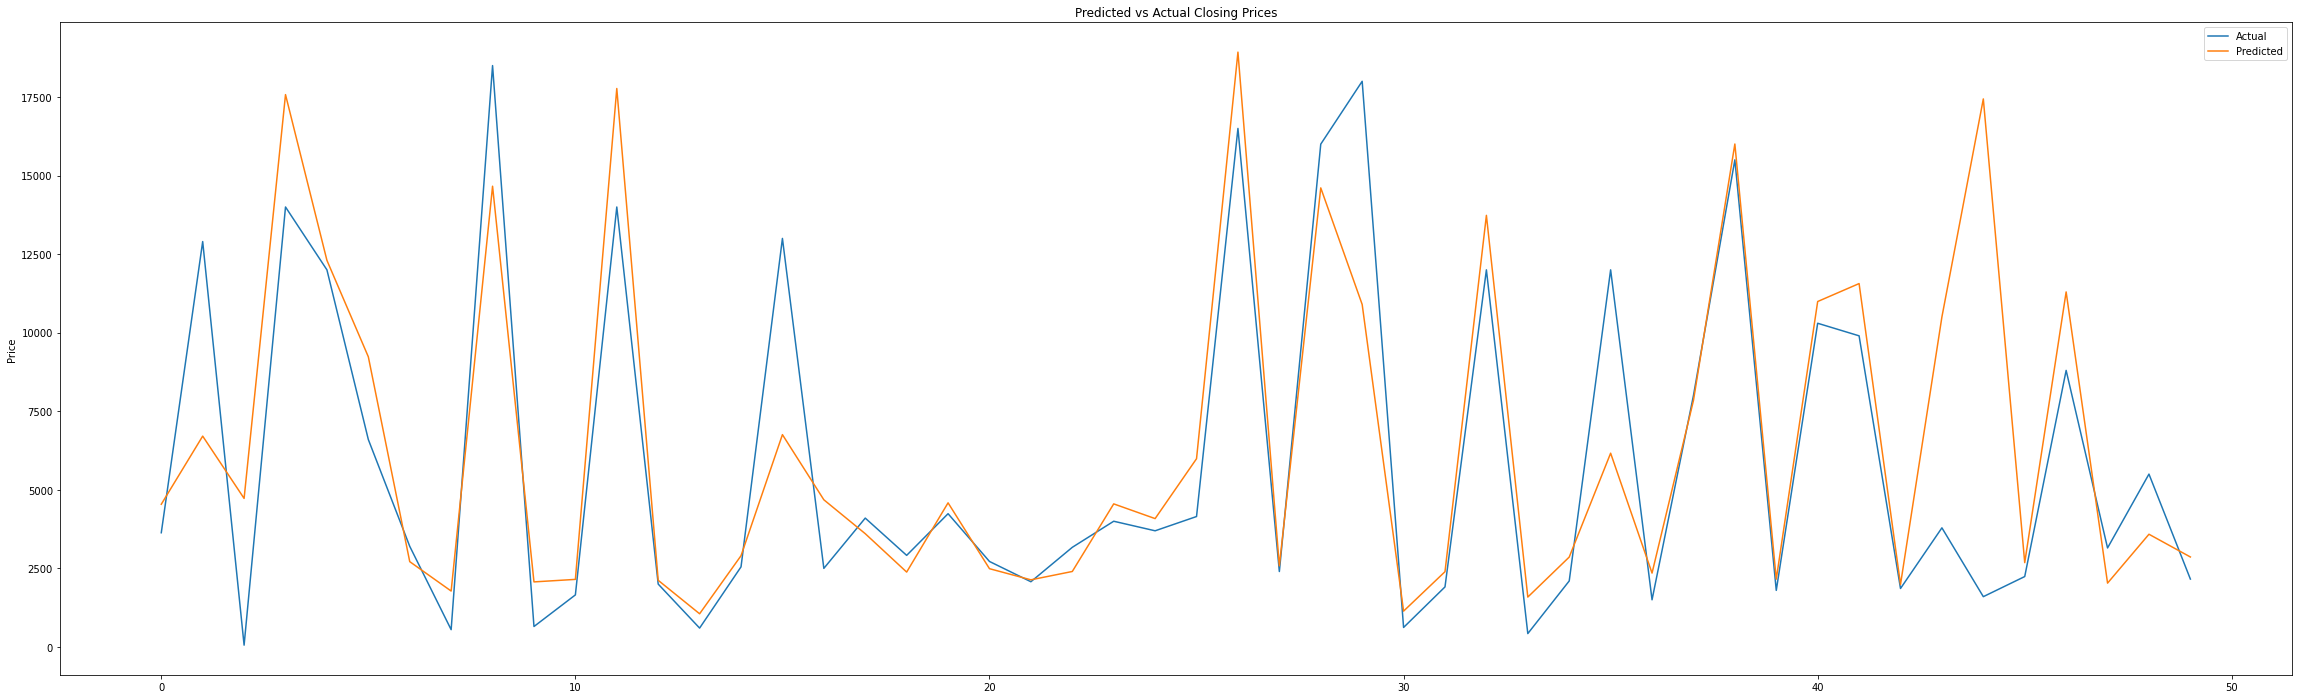

In [116]:
fig = plt.figure() 
fig.set_size_inches(40, 12)
plt.plot(y_test[:50], label='Actual')
plt.plot(y_predict[:50].tolist(), label='Predicted')
plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()